<a id="pre"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Business Problem</p>

<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">


- “For insurance companies, utilizing customer data is not just beneficial — it’s essential. Features such as age, gender, lifestyle habits, and health indicators play a pivotal role in evaluating risk, customizing coverage plans, and optimizing pricing strategies.”

<a id="pre"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Dataset Story</p>

<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

📊 This dataset contains customer-level data used to analyze and predict healthcare expenses and insurance premiums. It includes demographic, behavioral, and regional features such as age, gender, BMI, number of children, and discount eligibility. The goal is to understand how these attributes influence annual medical expenses and insurance premiums, and to support decision-making in pricing and risk evaluation.

🔍 Feature Descriptions:

🧓 AGE: Age of the insured person.

🧔 GENDER: Gender of the individual (0 = female, 1 = male).

🧈 BMI (Body Mass Index): An indicator of body fat based on height and weight.

👶 CHILDREN: Number of dependents or children.

🏷️ DISCOUNT_ELIGIBILITY: Whether the individual is eligible for a health-related discount (e.g., based on smoking status or wellness behavior).

🌍 REGION: The geographic area of the insured (e.g., southeast, northwest, etc.).

💰 EXPENSES: Actual medical expenses incurred during the year.

📦 PREMIUM: The annual insurance premium paid by the customer.

🧮 RISK_SCORE (engineered feature): A custom score combining age, obesity status, and discount eligibility to estimate the individual’s health risk level.

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import chardet

import csv
import itertools
import math

In [2]:
data = pd.read_csv("C:\\Users\\SONY\\Downloads\\Copy of medical_insurance.csv")
data

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,southeast,1629.83,16.2983
1336,21,female,25.8,0,no,southwest,2007.95,20.0795



<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">
• age: Age

 • gender: Gender

 • bmi: Body Mass Index

 • children: Number of children

 • discount_eligibility: Whether the person is eligible for a discount.

 • region: Geographic region

 • expenses: Medical expenses
 
 • premium: Insurance premium

In [3]:
df=pd.DataFrame(data)
df


,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,southeast,1629.83,16.2983
1336,21,female,25.8,0,no,southwest,2007.95,20.0795


In [4]:
df.describe(include="all")

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414,262.874685
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240,292.532178
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000,11.218700
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500,87.354250
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000,174.997400
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000,342.908900


In [5]:
df.describe(include="number")

,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


In [6]:
df.describe(include="object")

,gender,discount_eligibility,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [8]:
print(df.columns)

Index(['age', 'gender', 'bmi', 'children', 'discount_eligibility', 'region',
       'expenses', 'premium'],
      dtype='object')


In [9]:
def describe(df):
    
    
    variables = []   # Column names
    dtypes = []    # Data types of columns
    count = []      # Total number of entries in each column
    unique = []      # Number of unique values in each column
    missing = []    # Count of missing (NaN) values in each column
    
     # Loop through each column in the DataFrame
    for item in df.columns:
        variables.append(item)    # Append column name
        dtypes.append(df[item].dtype)  # Append column data type
        count.append(len(df[item]))   
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'Variable': variables, 
        'Dtype': dtypes,
        'Count': count,
        'Unique': unique,
        'Missing value': missing
    })    
        
    return output

In [10]:
describe(df)

,Variable,Dtype,Count,Unique,Missing value
0,age,int64,1338,47,0
1,gender,object,1338,2,0
2,bmi,float64,1338,275,0
3,children,int64,1338,6,0
4,discount_eligibility,object,1338,2,0
5,region,object,1338,4,0
6,expenses,float64,1338,1337,0
7,premium,float64,1338,1337,0


In [11]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
percent = pd.DataFrame(missing_value_df)
percent

,column_name,percent_missing
age,age,0.0
gender,gender,0.0
bmi,bmi,0.0
children,children,0.0
discount_eligibility,discount_eligibility,0.0
region,region,0.0
expenses,expenses,0.0
premium,premium,0.0


In [12]:
# Display unique values for each column
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("-" * 40)

Unique values in 'age':
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
----------------------------------------
Unique values in 'gender':
['female' 'male']
----------------------------------------
Unique values in 'bmi':
[27.9 33.8 33.  22.7 28.9 25.7 33.4 27.7 29.8 25.8 26.2 26.3 34.4 39.8
 42.1 24.6 30.8 23.8 40.3 35.3 36.  32.4 34.1 31.9 28.  23.1 32.8 17.4
 36.3 35.6 28.6 28.3 36.4 20.4 20.8 36.7 39.9 26.6 36.6 21.8 37.1 37.3
 38.7 34.8 24.5 35.2 33.6 28.7 37.  31.8 31.7 22.9 27.4 33.7 24.7 25.9
 22.4 39.1 36.2 24.  24.8 28.5 28.1 32.  34.  29.6 35.5 26.9 38.3 37.6
 41.2 31.2 27.2 27.  39.5 31.3 20.  19.3 31.6 25.5 30.1 29.9 27.5 28.4
 30.9 35.1 29.7 35.7 32.2 49.1 23.4 29.  31.4 33.9 28.8 37.4 17.8 34.7
 26.5 22.  35.9 25.6 25.2 32.5 25.3 38.8 30.5 37.7 24.1 24.4 27.8 36.9
 39.6 28.2 33.2 18.9 41.5 30.3 16.  33.3 29.2 26.4 30.7 41.9 32.1 30.6
 18.1 39.3 36.1 22.3 26.7 23.2 38.1 22.2 3

<a id="pre"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Data preparation</p>


In [13]:
print(df.nunique())

age                       47
gender                     2
bmi                      275
children                   6
discount_eligibility       2
region                     4
expenses                1337
premium                 1337
dtype: int64


In [14]:
for column in df.columns:
    print(f"Value counts for '{column}':")
    print(df[column].value_counts())
    print("-" * 40)

Value counts for 'age':
age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
----------------------------------------
Value counts for 'gender':
gender
male      676
female    662
Name: count, dtype: int64
----------------------------------------
Value counts for 'bmi':
bmi
27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
39.0     1
40.8     1
20.3     1
18.5     1
53.1     1
Name: count, Length: 275, dtype: int64
----------------------------------------
Value counts for 'children':
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
------

In [15]:
df.isnull().sum()

age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64

In [16]:
# identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# result
print("Numeric columns:")
print(numeric_cols)

print("\nCategorical columns:")
print(categorical_cols)

Numeric columns:
['age', 'bmi', 'children', 'expenses', 'premium']

Categorical columns:
['gender', 'discount_eligibility', 'region']


In [17]:


df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.0000,51.0000,64.0000
bmi,1338.0,30.665471,6.098382,16.0000,26.30000,30.4000,34.7000,53.1000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.0000,2.0000,5.0000
expenses,1338.0,13270.422414,12110.011240,1121.8700,4740.28750,9382.0300,16639.9150,63770.4300
premium,1338.0,262.874685,292.532178,11.2187,87.35425,174.9974,342.9089,1983.1064


<a id="pre"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Outlier Detection</p>

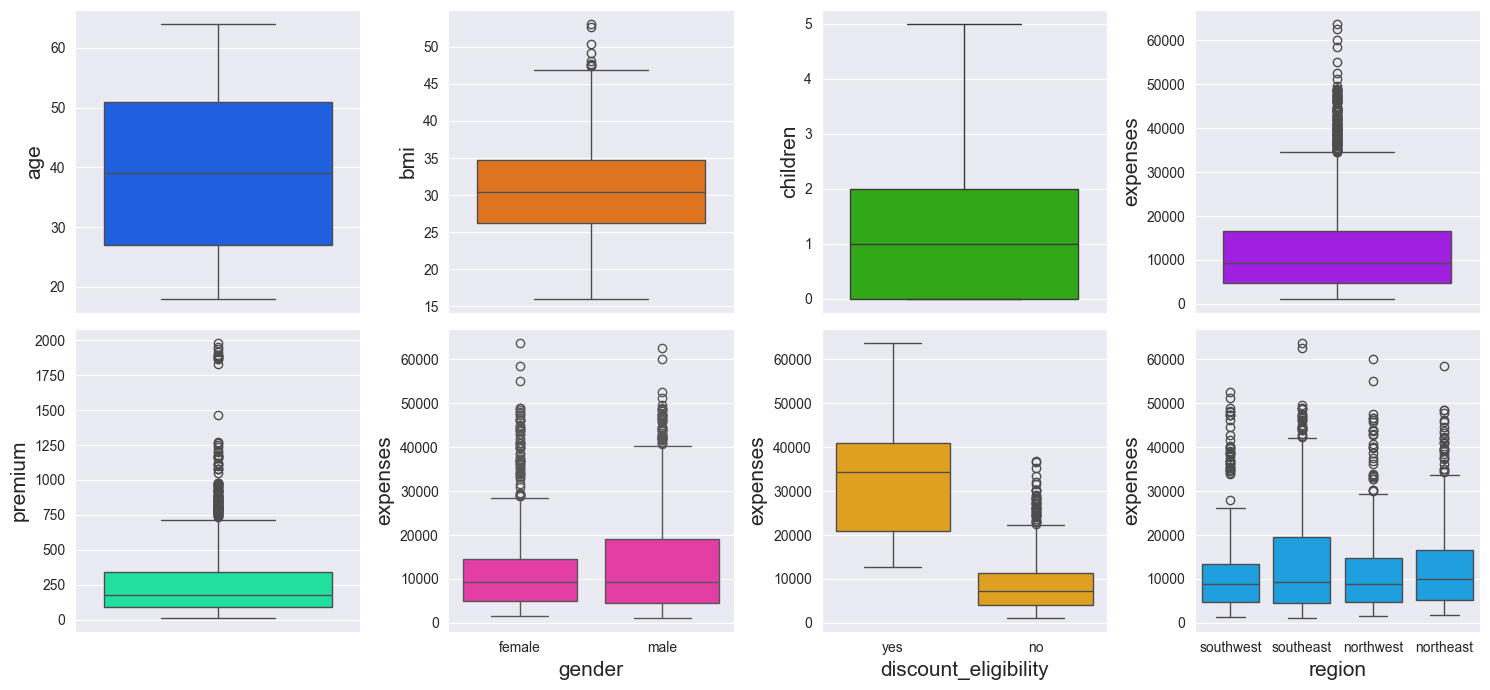

In [18]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00', '#aa00ff', '#00ffaa', '#ff22aa', '#ffaa00', '#00aaff']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, 
                              df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y],color=colors[i % len(colors)])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='expenses', ax=ax[x,y],color=colors[i % len(colors)])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

In [19]:
# select numeric columns
#identify outliers
numerical_cols = ['age', 'bmi', 'children', 'expenses', 'premium'] 
# calculate the upper and lower range for each numeric column.
for col in numerical_cols:
    print(f"\n--- IQR Bounds for {col} ---") 
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}") 
    print(f"IQR: {IQR}")
    print(f"Lower bound: {lower_bound}") 
    print(f"Upper bound: {upper_bound}") 
    # outliers 
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
     
    print(f"Number of outliers: {len(outliers)}")

 


--- IQR Bounds for age ---
Q1 (25th percentile): 27.0
Q3 (75th percentile): 51.0
IQR: 24.0
Lower bound: -9.0
Upper bound: 87.0
Number of outliers: 0

--- IQR Bounds for bmi ---
Q1 (25th percentile): 26.3
Q3 (75th percentile): 34.7
IQR: 8.400000000000002
Lower bound: 13.699999999999998
Upper bound: 47.300000000000004
Number of outliers: 9

--- IQR Bounds for children ---
Q1 (25th percentile): 0.0
Q3 (75th percentile): 2.0
IQR: 2.0
Lower bound: -3.0
Upper bound: 5.0
Number of outliers: 0

--- IQR Bounds for expenses ---
Q1 (25th percentile): 4740.2875
Q3 (75th percentile): 16639.915
IQR: 11899.6275
Lower bound: -13109.15375
Upper bound: 34489.35625
Number of outliers: 139

--- IQR Bounds for premium ---
Q1 (25th percentile): 87.35425000000001
Q3 (75th percentile): 342.9089
IQR: 255.55465
Lower bound: -295.97772499999996
Upper bound: 726.240875
Number of outliers: 113


In [20]:
outliers_indexes = []
target = 'expenses'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())
        
        
for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

208 outliers were identified, whose indices are:

[516, 1031, 520, 9, 11, 524, 1037, 526, 1039, 14, 1036, 530, 19, 23, 1047, 1049, 539, 29, 30, 543, 34, 549, 1062, 39, 38, 558, 1070, 49, 53, 1078, 55, 569, 573, 62, 1088, 577, 1090, 1093, 1096, 1098, 587, 82, 84, 86, 599, 1111, 1117, 94, 1118, 1120, 609, 1122, 1124, 103, 615, 618, 109, 621, 623, 1139, 115, 629, 1142, 116, 1146, 123, 637, 128, 1152, 641, 1156, 138, 140, 146, 658, 664, 665, 667, 668, 158, 161, 674, 1186, 677, 682, 1196, 175, 688, 689, 1206, 1207, 696, 185, 697, 1211, 706, 1218, 203, 1230, 725, 1240, 1241, 219, 223, 736, 1249, 738, 739, 227, 742, 1258, 240, 1265, 242, 1267, 244, 245, 759, 251, 252, 254, 256, 770, 259, 1284, 263, 1288, 265, 1291, 271, 1300, 1301, 1303, 281, 1308, 286, 288, 1313, 289, 803, 292, 1317, 806, 1321, 298, 1323, 819, 312, 1337, 314, 826, 828, 321, 322, 327, 328, 330, 842, 845, 847, 850, 338, 852, 856, 860, 355, 876, 883, 373, 377, 890, 379, 381, 893, 387, 901, 401, 917, 925, 419, 420, 421, 422, 936

In [21]:
df.loc[outliers_indexes]

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
516,20,male,35.3,1,no,southeast,27724.29,277.2429
1031,55,female,35.2,0,yes,southeast,44423.80,888.4760
520,50,female,27.4,0,no,northeast,25656.58,513.1316
9,60,female,25.8,0,no,northwest,28923.14,578.4628
11,62,female,26.3,0,yes,southeast,27808.73,1112.3492
...,...,...,...,...,...,...,...,...
1012,61,female,33.3,4,no,southeast,36580.28,1463.2112
500,29,male,34.4,0,yes,southwest,36197.70,361.9770
1019,21,female,32.7,2,no,northwest,26018.95,260.1895
1021,22,female,31.0,3,yes,southeast,35595.59,355.9559


In [22]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [23]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 1338
Variables: 8
cat_cols: 4
num_cols: 4
cat_but_car: 0
num_but_cat: 1


<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

- The dataset contains 1338 rows and 8 features. Using the grab_col_names() function, the features are categorized as follows:

 • 4 categorical features: This includes both object-type columns (e.g., gender, region) and numeric 
 
 columns with low cardinality (e.g., children).

 • 4 numerical features: These are continuous variables such as age, bmi, and premium.

 • 0 cardinal categorical features: There are no object-type columns with high cardinality, so there’s no
 
  concern about high-dimensionality from categorical variables.

 • 1 numerical but categorical feature: One numeric column (likely children) has a small number of unique

  values and is treated as categorical for modeling purposes.

In [24]:
cat_cols

['gender', 'discount_eligibility', 'region', 'children']

In [25]:
num_cols

['age', 'bmi', 'expenses', 'premium']

In [26]:
cat_but_car

[]

In [27]:
num_but_cat

['children']

In [28]:
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [29]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [30]:
for col in num_cols:
    print(col, check_outlier(df, col))

age False
bmi False
expenses False
premium True


Only the premium feature contains outliers.

Analysis of Categorical Variables

In [31]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe, palette="viridis")
        plt.xticks(rotation=45)
        plt.show(block=True)

        gender      Ratio
gender                   
male       676  50.523169
female     662  49.476831
##########################################


C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\2808979680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="viridis")


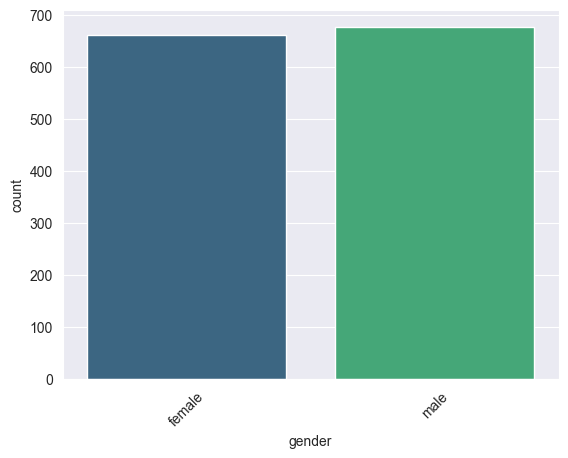

                      discount_eligibility      Ratio
discount_eligibility                                 
no                                    1064  79.521674
yes                                    274  20.478326
##########################################


C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\2808979680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="viridis")


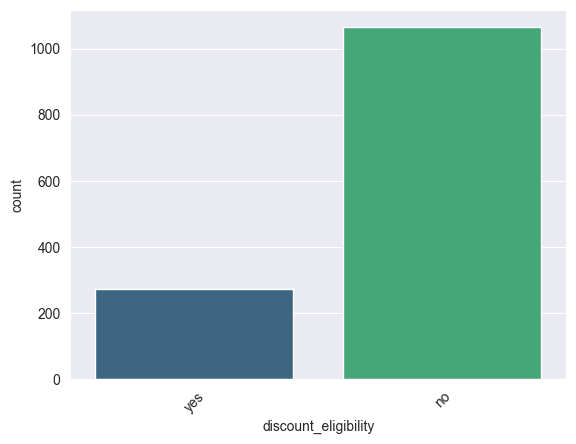

           region      Ratio
region                      
southeast     364  27.204783
southwest     325  24.289985
northwest     325  24.289985
northeast     324  24.215247
##########################################


C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\2808979680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="viridis")


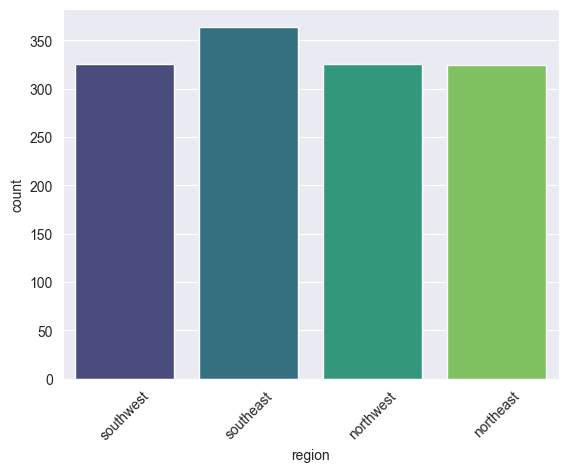

          children      Ratio
children                     
0              574  42.899851
1              324  24.215247
2              240  17.937220
3              157  11.733931
4               25   1.868460
5               18   1.345291
##########################################


C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\2808979680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe[col_name], data=dataframe, palette="viridis")


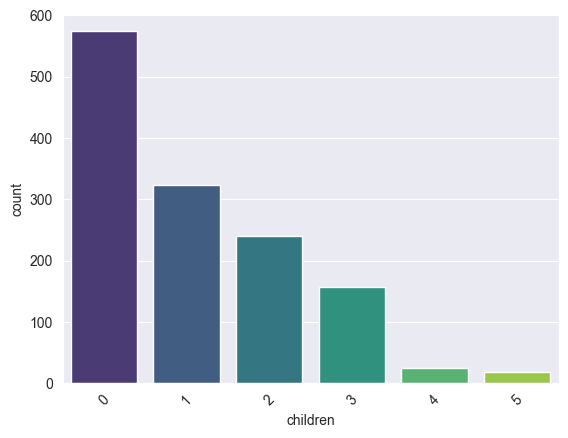

In [32]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\1176935326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[CatCols] = df1[CatCols].astype(str)
C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\1176935326.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(x=col, data=df, ax=ax[i], palette=colors[i])
C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\1176935326.py:17: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  chart = sns.countplot(x=col, data=df, ax=ax[i], palette=colors[i])
C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\1176935326

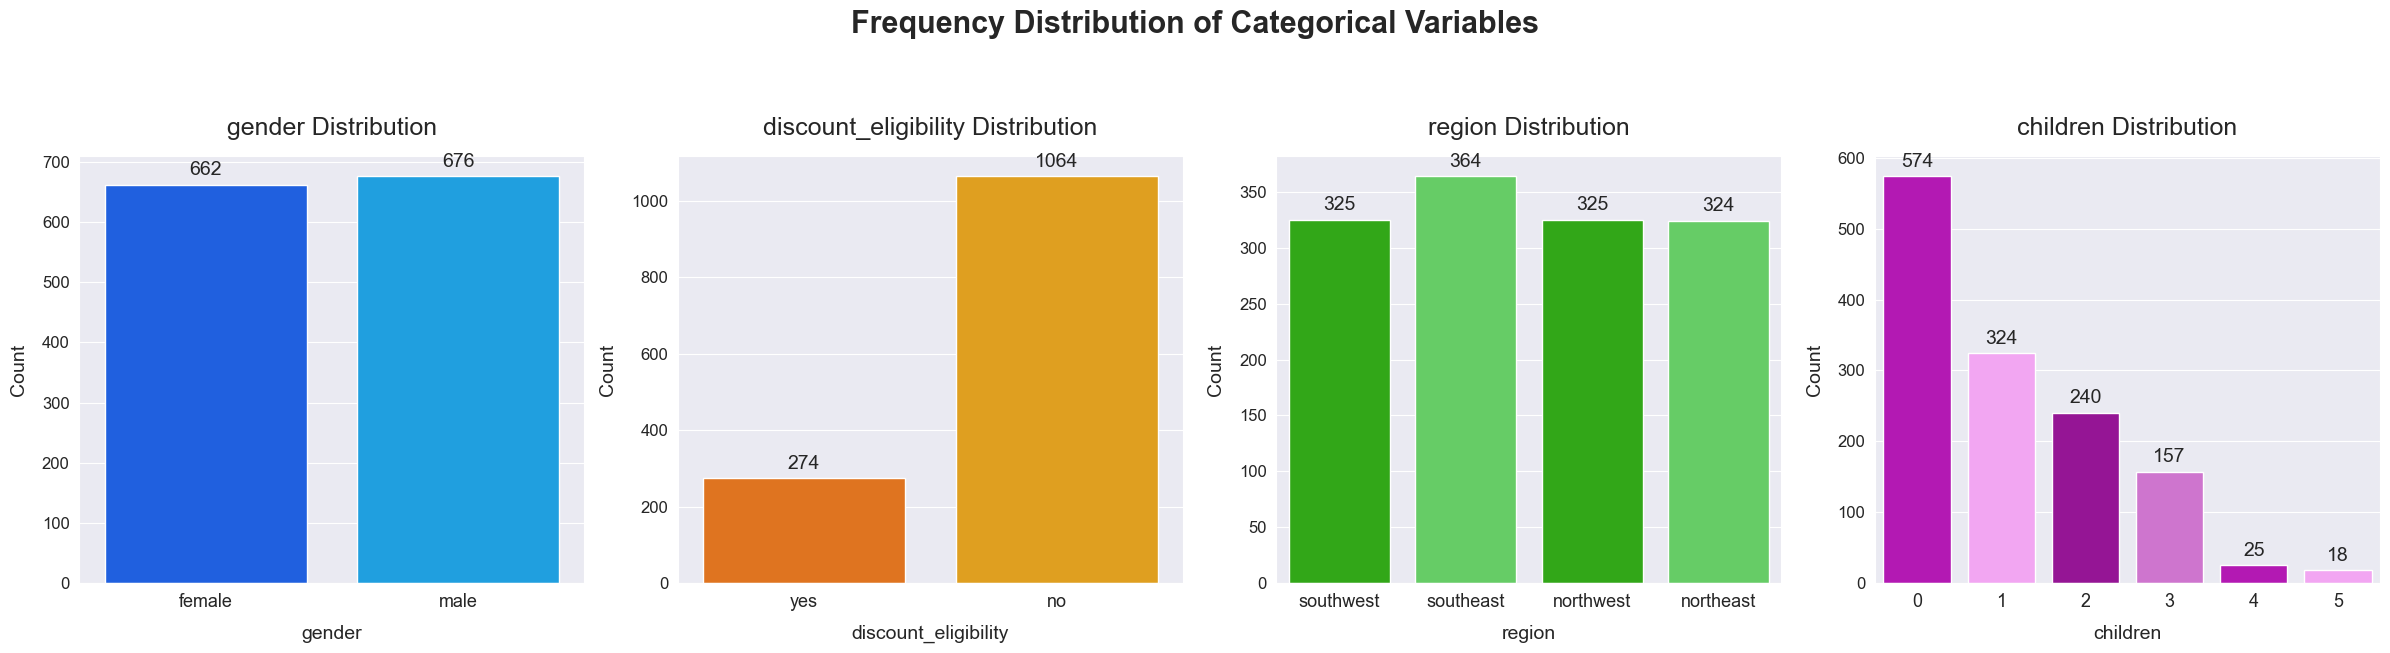

In [33]:
# Categorical columns
CatCols = ['gender', 'discount_eligibility', 'region', 'children']
df1[CatCols] = df1[CatCols].astype(str)

# Colors
colors = [
    ['#0055ff', '#00aaff', '#3399ff'],         
    ['#ff7000', '#ffaa00'],                    
    ['#23bf00', '#55dd55'],                   
    ['#cc00cc', '#ff99ff', '#aa00aa', '#dd66dd'] 
]

# Plot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24, 6), dpi=100)

for i, col in enumerate(CatCols):
    chart = sns.countplot(x=col, data=df, ax=ax[i], palette=colors[i])
    ax[i].set_title(f'{col} Distribution', fontsize=18, pad=15)
    ax[i].set_xlabel(col, fontsize=14, labelpad=10)
    ax[i].set_ylabel('Count', fontsize=14, labelpad=10)
    ax[i].tick_params(axis='x', labelsize=13)
    ax[i].tick_params(axis='y', labelsize=12)

    # Add value labels on top of each bar
    for container in chart.containers:
        chart.bar_label(container, fontsize=14, padding=4)

# Main title with space
plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=22, fontweight='bold', y=1.08)
plt.tight_layout()
plt.show()

 Analysis of Numerical Variables

In [34]:
def num_summary(dataframe, col_name, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        sns.histplot(data=dataframe, x=col_name, bins=20, kde=True, color="blue")
        plt.xticks(rotation=45)
        plt.show(block=True)

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
5%         18.000000
10%        19.000000
20%        24.000000
30%        29.000000
40%        34.000000
50%        39.000000
60%        44.000000
70%        49.000000
80%        54.000000
90%        59.000000
95%        62.000000
99%        64.000000
max        64.000000
Name: age, dtype: float64


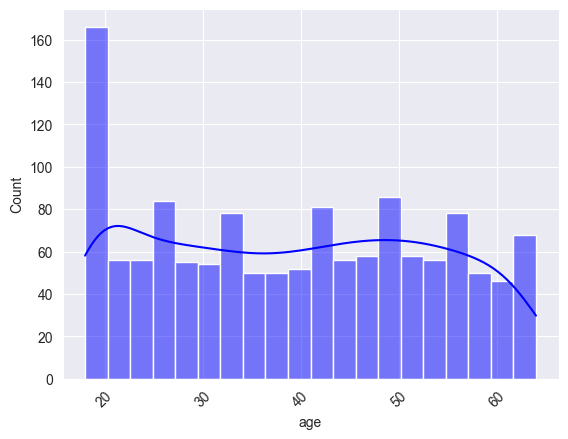

count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
5%         21.270000
10%        23.000000
20%        25.340000
30%        27.400000
40%        28.800000
50%        30.400000
60%        32.020000
70%        33.700000
80%        35.900000
90%        38.630000
95%        41.100000
99%        46.389000
max        53.100000
Name: bmi, dtype: float64


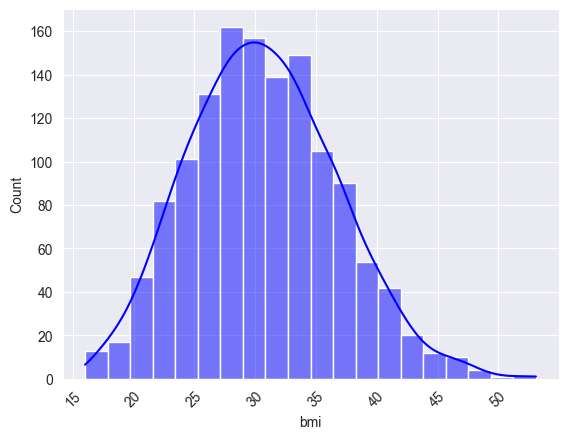

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
5%        1757.754500
10%       2346.535000
20%       3991.576000
30%       5484.849000
40%       7369.052000
50%       9382.030000
60%      11399.858000
70%      13767.877000
80%      20260.626000
90%      34831.716000
95%      41181.826000
99%      48537.480600
max      63770.430000
Name: expenses, dtype: float64


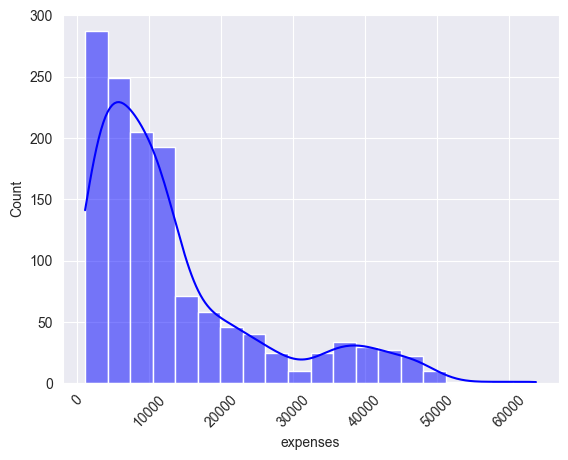

count    1338.000000
mean      262.874685
std       292.532178
min        11.218700
5%         17.577545
10%        23.465350
20%        42.358100
30%       108.813600
40%       144.416780
50%       174.997400
60%       208.205120
70%       245.391680
80%       409.298580
90%       597.103720
95%       857.475830
99%      1271.483418
max      1983.106400
Name: premium, dtype: float64


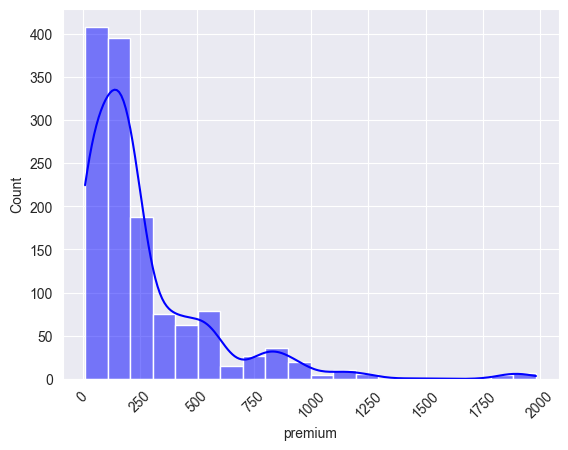

In [35]:
for col in num_cols:
    num_summary(df, col, plot=True)

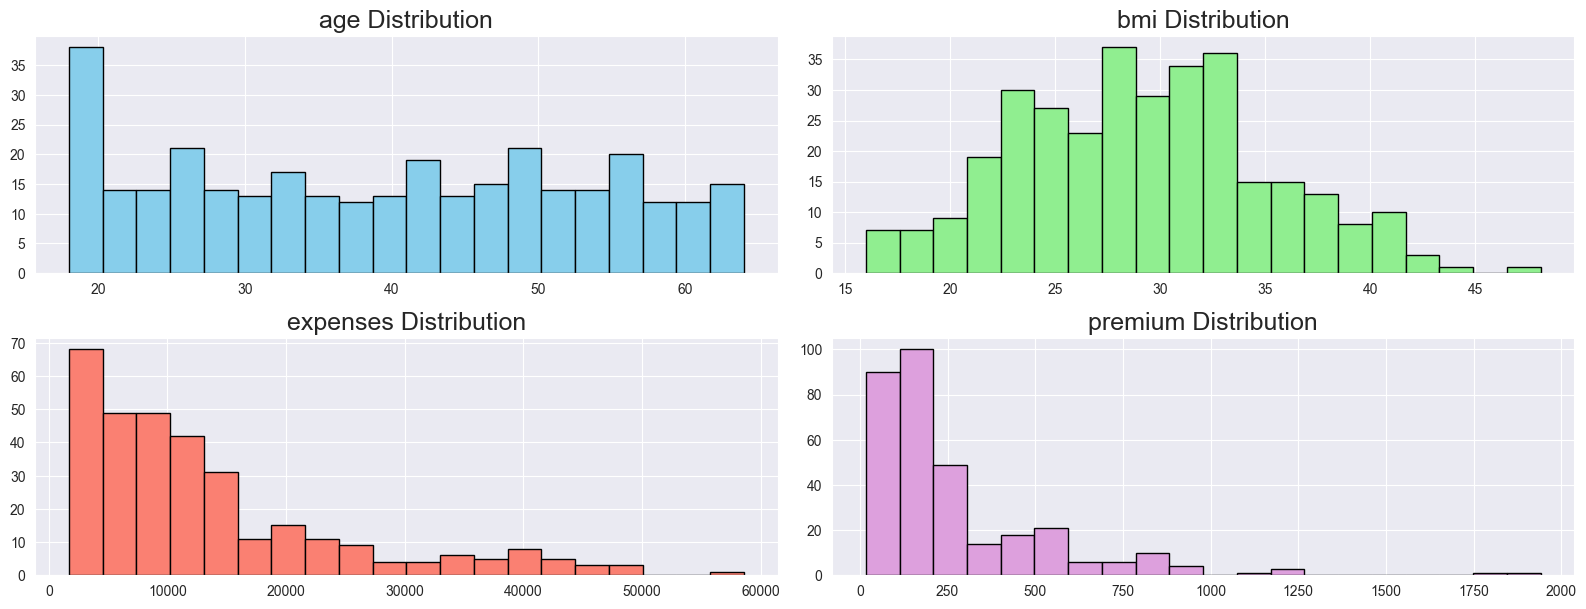

In [36]:
# list of 6 columns you want to chart
# colors list
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']
# numeric values 
columns = ['age', 'bmi', 'expenses', 'premium']

# making a large figure with rhe right size 
plt.figure(figsize=(16, 12))

# loop for drawing each chart
for i, col in enumerate(columns):
    plt.subplot(4, 2, i + 1) 
    plt.hist(df1[col], bins=20, color=colors[i%len(colors)], edgecolor='black')
    plt.title(f"{col} Distribution",fontsize=18)

# adjusting distancesا
plt.tight_layout()
plt.show()

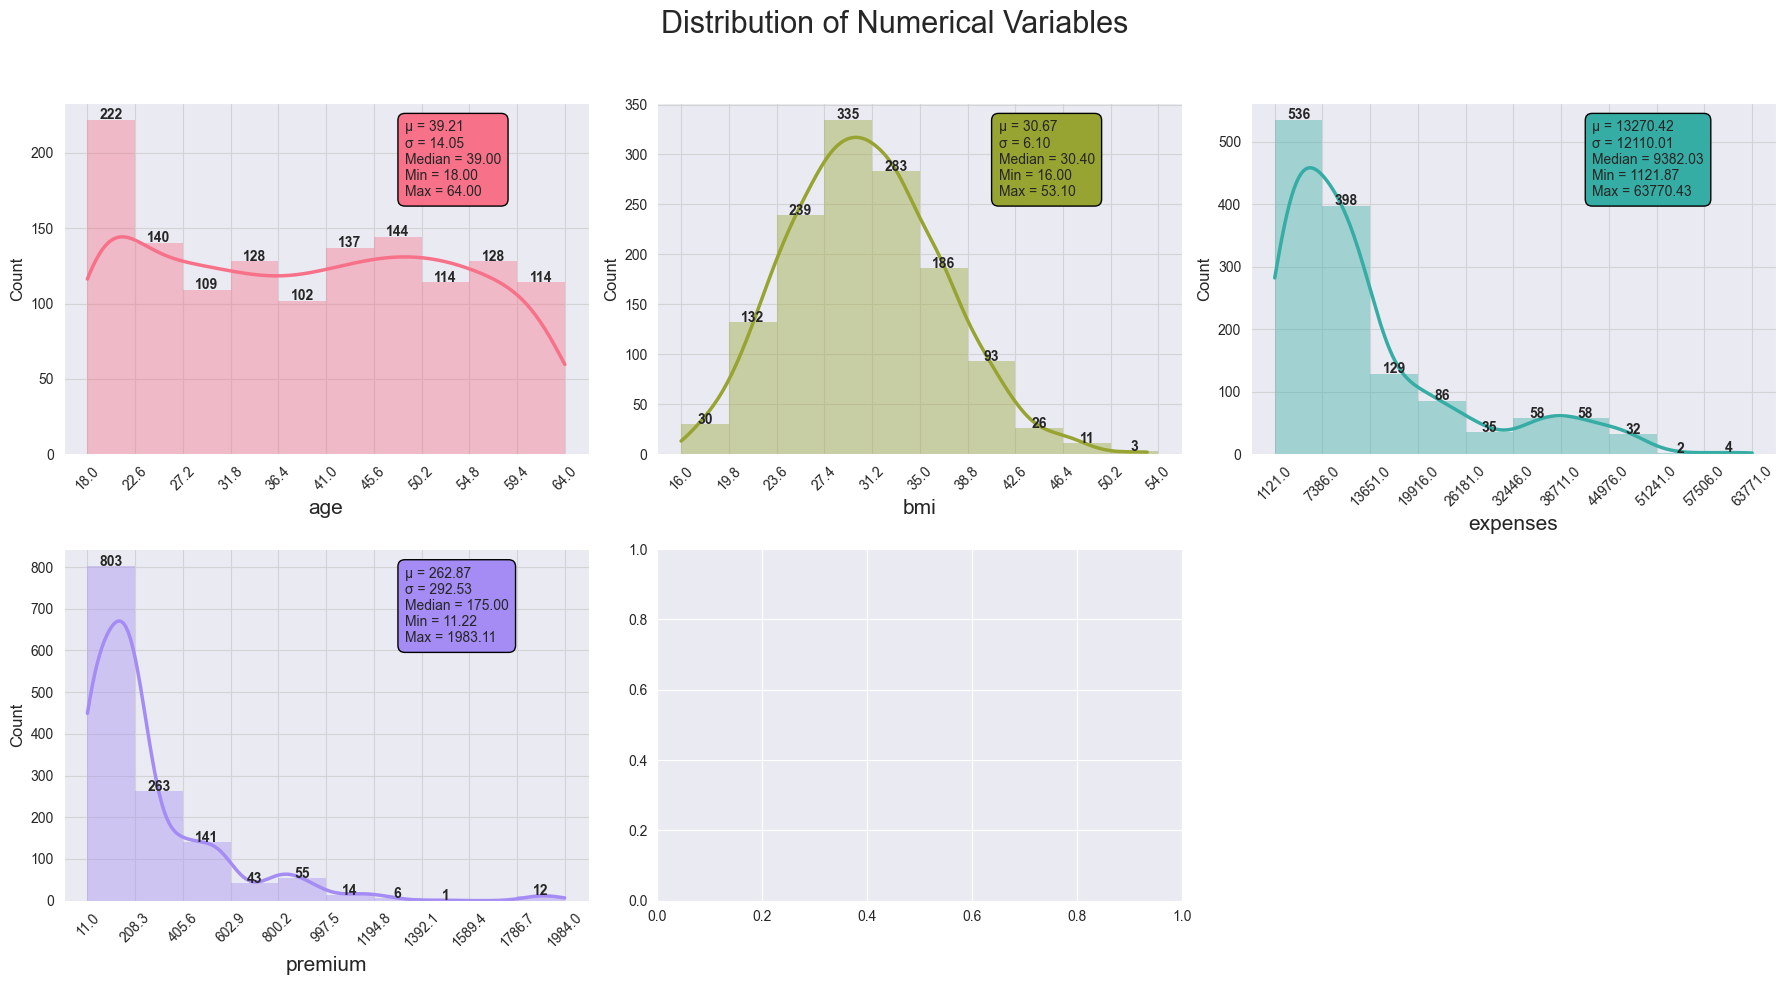

In [37]:

# Select numeric columns to plot
NumCols = ['age', 'bmi', 'expenses', 'premium']

# Setup subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), dpi=100)
colors = sns.color_palette("husl", len(NumCols))

for i in range(len(NumCols)):
    row = i // 3
    col = i % 3
    values, bin_edges = np.histogram(df[NumCols[i]], 
                                     range=(np.floor(df[NumCols[i]].min()), np.ceil(df[NumCols[i]].max())))
    
    graph = sns.histplot(data=df, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row, col],
                         edgecolor='none', color=colors[i], alpha=0.4, line_kws={'lw': 2.5})
    
    ax[row, col].set_xlabel(NumCols[i], fontsize=15)
    ax[row, col].set_ylabel('Count', fontsize=12)
    ax[row, col].set_xticks(np.round(bin_edges, 1))
    ax[row, col].set_xticklabels(ax[row, col].get_xticks(), rotation=45)
    ax[row, col].grid(color='lightgrey')

    for p in graph.patches:
        height = p.get_height()
        if height > 0:
            ax[row, col].annotate(f'{int(height)}',
                                  (p.get_x() + p.get_width() / 2, height + 0.5),
                                  ha='center', fontsize=10, fontweight="bold")

    stats_text = '\n'.join([
        f'μ = {df[NumCols[i]].mean():.2f}',
        f'σ = {df[NumCols[i]].std():.2f}',
        f'Median = {np.median(df[NumCols[i]]):.2f}',
        f'Min = {df[NumCols[i]].min():.2f}',
        f'Max = {df[NumCols[i]].max():.2f}'
    ])

    ax[row, col].text(0.65, 0.95, stats_text, transform=ax[row, col].transAxes,
                      fontsize=10, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor=colors[i], edgecolor='black', pad=0.5))

# Turn off the 6th empty plot
ax[1, 2].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

-1️⃣ Feature: age

 • Mean (μ): 39.21
 • Standard Deviation (σ): 14.05
 • Median: 39
 • Min / Max: 18 / 64
 • Distribution: Fairly spread out with peaks around ages 18 and 50

✅ Interpretation:

 • The age data is well-distributed between 18 and 64.
 • The highest concentration is at age 18 (222 individuals), possibly indicating a large group of young adults.
 • The distribution is not perfectly normal, but it is usable as-is for modeling.

⸻

2️⃣ Feature: expenses

 • Mean (μ): 13,270.42
 • Standard Deviation (σ): 12,110.01
 • Median: 9,382.03
 • Min / Max: 1,121.87 / 63,770.43
 • Distribution: Strong right skew (positively skewed)

✅ Interpretation:

 • The data contains many high-cost outliers.
 • There’s a large gap between the mean and median, indicating heavy skewness.
 • Should be log-transformed or normalized before modeling.

⸻

3️⃣ Feature: premium

 • Mean (μ): 262.87
 • Standard Deviation (σ): 292.53
 • Median: 175
 • Min / Max: 11.22 / 1983.11
 • Distribution: Highly right-skewed

✅ Interpretation:

 • Most customers pay low premiums, with a few paying very high amounts.
 • Outliers significantly affect the mean and spread.
 • Similar to expenses, it may require transformation.

⸻

4️⃣ Feature: bmi

 • Mean (μ): 30.67
 • Standard Deviation (σ): 6.10
 • Median: 30.40
 • Min / Max: 16.00 / 53.10
 • Distribution: Roughly normal (bell-shaped)

✅ Interpretation:

 • The most suitable numerical variable for modeling without preprocessing.
 • Peak occurs in the overweight BMI range (around 30–35).
 • No major skew or outliers.

<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;"> Analysis of Categorical Variables by Target</p>

In [38]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe, palette="viridis")
        plt.xticks(rotation=45)
        plt.show(block=True)

         TARGET_MEAN
gender              
female  12569.578897
male    13956.751420




C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3835308624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_col, y=target, data=dataframe, palette="viridis")


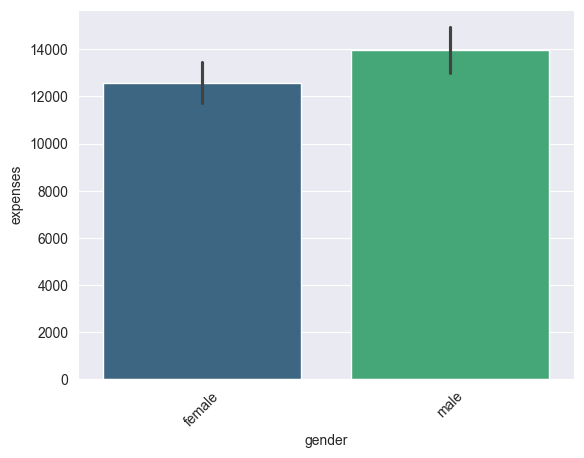

                       TARGET_MEAN
discount_eligibility              
no                     8434.268449
yes                   32050.231971




C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3835308624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_col, y=target, data=dataframe, palette="viridis")


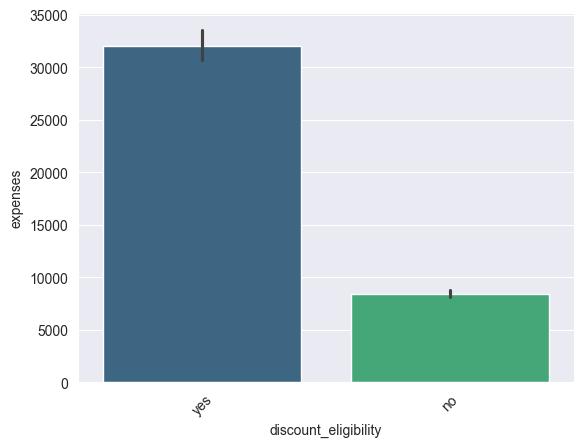

            TARGET_MEAN
region                 
northeast  13406.384691
northwest  12417.575169
southeast  14735.411538
southwest  12346.937908




C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3835308624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_col, y=target, data=dataframe, palette="viridis")


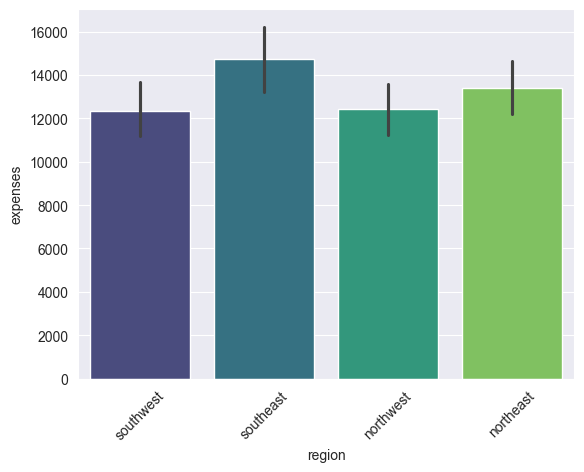

           TARGET_MEAN
children              
0         12365.975767
1         12731.171821
2         15073.564000
3         15355.318535
4         13850.656800
5          8786.035556




C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3835308624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorical_col, y=target, data=dataframe, palette="viridis")


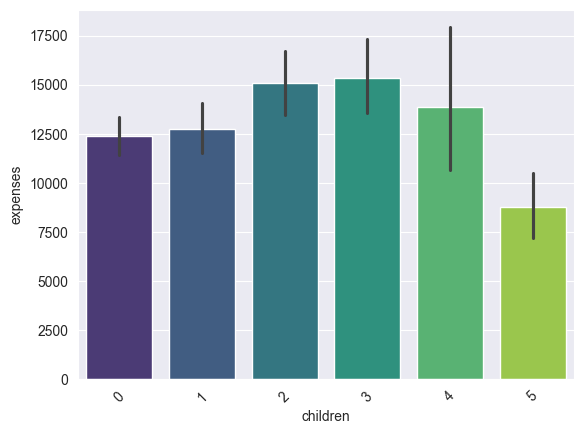

In [39]:
for col in cat_cols:
    target_summary_with_cat(df, "expenses", col, plot=True)

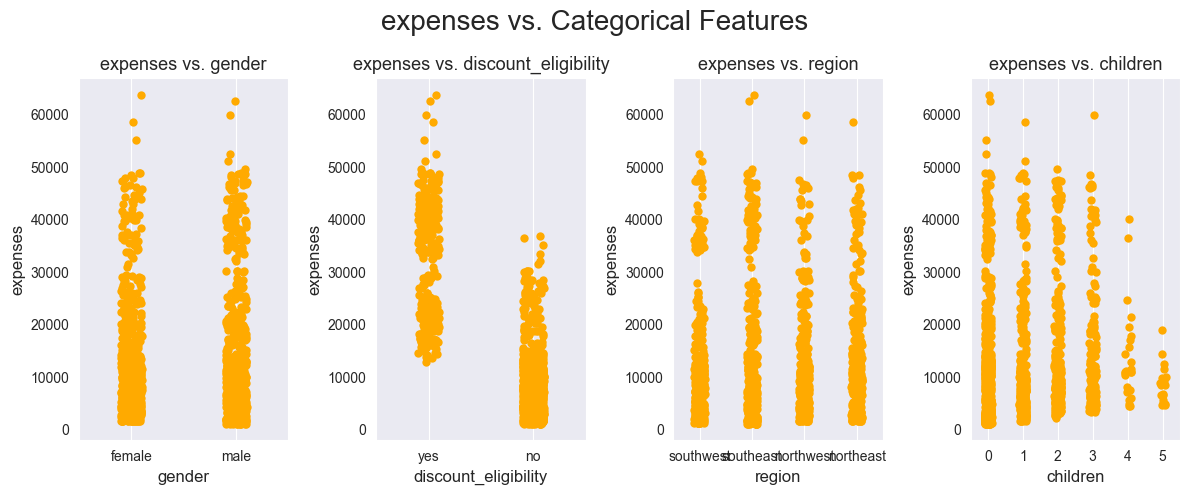

In [40]:
fig, axes = plt.subplots(nrows=1 ,ncols=4, figsize=(12,5), dpi=100)
cat_features = ['gender', 'discount_eligibility', 'region', 'children']
target = 'expenses'
c = '#ffaa00'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('expenses vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Analysis of Numeric Variables by Target</p>

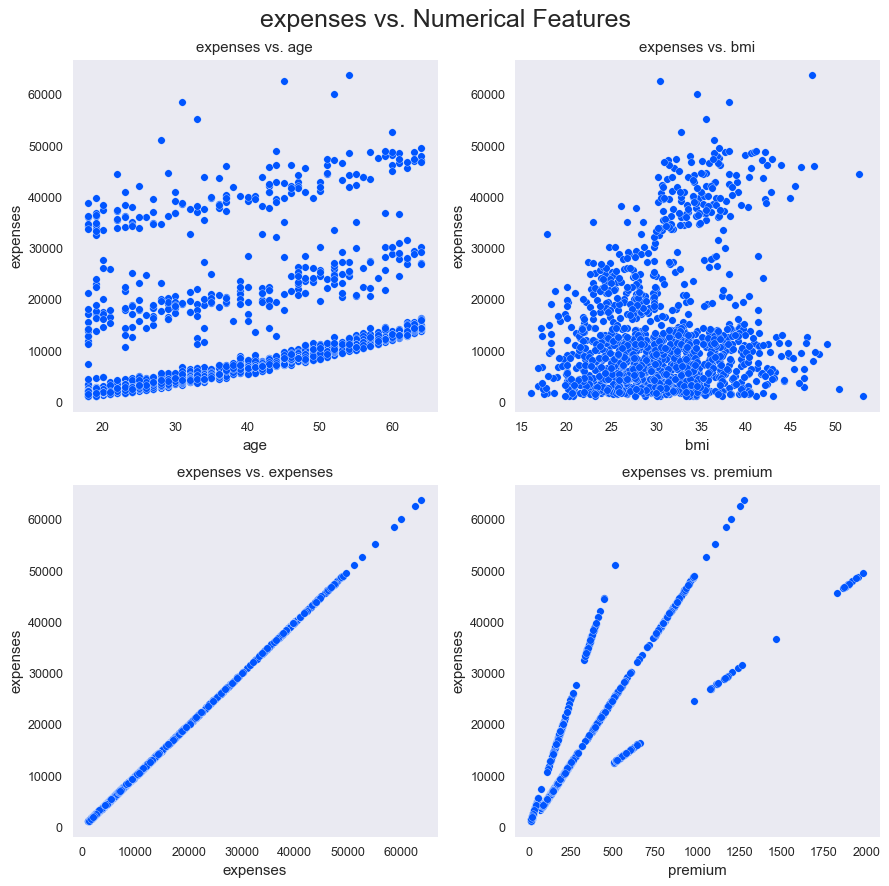

In [41]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['age', 'bmi', 'expenses', 'premium']
target = 'expenses'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df[num_features[i]], df[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('expenses vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

In [42]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

In [43]:
for col in num_cols:
    target_summary_with_num(df, "expenses", col, plot=False)

          age_mean
expenses          
1121.87       18.0
1131.51       18.0
1135.94       18.0
1136.40       18.0
1137.01       18.0
...            ...
55135.40      33.0
58571.07      31.0
60021.40      52.0
62592.87      45.0
63770.43      54.0

[1337 rows x 1 columns]


          bmi_mean
expenses          
1121.87       23.2
1131.51       30.1
1135.94       33.3
1136.40       33.7
1137.01       34.1
...            ...
55135.40      35.5
58571.07      38.1
60021.40      34.5
62592.87      30.4
63770.43      47.4

[1337 rows x 1 columns]


          expenses_mean
expenses               
1121.87         1121.87
1131.51         1131.51
1135.94         1135.94
1136.40         1136.40
1137.01         1137.01
...                 ...
55135.40       55135.40
58571.07       58571.07
60021.40       60021.40
62592.87       62592.87
63770.43       63770.43

[1337 rows x 1 columns]


          premium_mean
expenses              
1121.87        11.2187
1131.51        11.3151
1135.94        11.359

In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
# List of categorical variables to test against the target
categorical_cols = ['gender', 'discount_eligibility', 'region', 'children']
target = 'expenses'

# Loop through each categorical feature
for col in categorical_cols:
    print(f"\n🔹 ANOVA for '{col}' on '{target}':\n")

    # Build an Ordinary Least Squares (OLS) model
    model = ols(f'{target} ~ C({col})', data=df).fit()

    # Perform ANOVA on the fitted model
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Print the ANOVA summary table
    print(anova_table)

    # Extract the p-value from the table
    p_value = anova_table['PR(>F)'][0]

    # Interpret the result: check statistical significance
    if p_value < 0.05:
        print(f"✅ The effect of '{col}' on '{target}' is statistically significant (p-value = {p_value:.4f})")
    else:
        print(f"❌ No statistically significant effect of '{col}' on '{target}' (p-value = {p_value:.4f})")


🔹 ANOVA for 'gender' on 'expenses':

                 sum_sq      df         F    PR(>F)
C(gender)  6.435904e+08     1.0  4.399703  0.036133
Residual   1.954306e+11  1336.0       NaN       NaN
✅ The effect of 'gender' on 'expenses' is statistically significant (p-value = 0.0361)

🔹 ANOVA for 'discount_eligibility' on 'expenses':

                               sum_sq      df            F         PR(>F)
C(discount_eligibility)  1.215199e+11     1.0  2177.614859  8.271450e-283
Residual                 7.455432e+10  1336.0          NaN            NaN
✅ The effect of 'discount_eligibility' on 'expenses' is statistically significant (p-value = 0.0000)

🔹 ANOVA for 'region' on 'expenses':

                 sum_sq      df         F    PR(>F)
C(region)  1.300760e+09     3.0  2.969627  0.030893
Residual   1.947735e+11  1334.0       NaN       NaN
✅ The effect of 'region' on 'expenses' is statistically significant (p-value = 0.0309)

🔹 ANOVA for 'children' on 'expenses':

                   sum_

C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\109903401.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\109903401.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\109903401.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0

🔍 Checking Outliers in Numeric Columns:

📊 age
  Q1: 27.00, Q3: 51.00, IQR: 24.00
  Lower Bound: -9.00, Upper Bound: 87.00
  Outliers: 0 rows (0.00%)


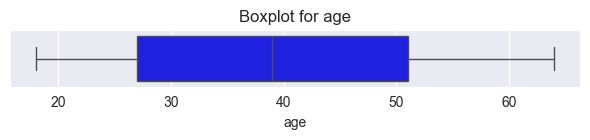


📊 bmi
  Q1: 24.88, Q3: 32.92, IQR: 8.05
  Lower Bound: 12.80, Upper Bound: 45.00
  Outliers: 1 rows (0.31%)


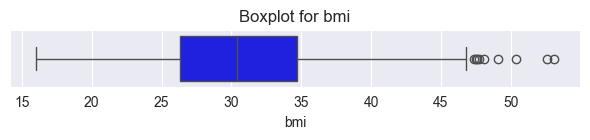


📊 expenses
  Q1: 5194.32, Q3: 16687.37, IQR: 11493.04
  Lower Bound: -12045.24, Upper Bound: 33926.93
  Outliers: 29 rows (8.95%)


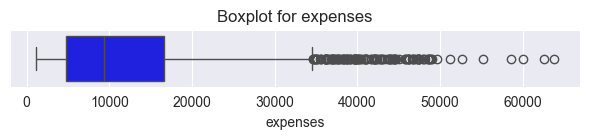


📊 premium
  Q1: 98.22, Q3: 343.45, IQR: 245.23
  Lower Bound: -269.62, Upper Bound: 711.29
  Outliers: 25 rows (7.72%)


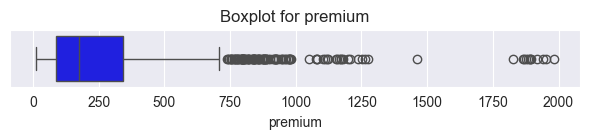

In [45]:
# Identify numeric and categorical columns
numerical_cols = ['age', 'bmi', 'expenses', 'premium']
categorical_cols = ['gender', 'discount_eligibility', 'region', 'children']

# -----------------------------
# 1️⃣ NUMERICAL OUTLIERS (IQR)
# -----------------------------

print("🔍 Checking Outliers in Numeric Columns:")
for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower) | (df1[col] > upper)]
    percentage = (len(outliers) / len(df1)) * 100
    
    print(f"\n📊 {col}")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"  Outliers: {len(outliers)} rows ({percentage:.2f}%)")

    # Boxplot
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()


    

<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;"> Correlation Analysis</p>

In [46]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    # Only numerical columns
    numeric_df = dataframe.select_dtypes(include=[np.number])

    # Correlation matrix
    corr = numeric_df.corr()
    cor_matrix = corr.abs()

    # Select upper triangular matrix (to remove unnecessary repetitions)
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    # Let's select the column pairs whose correlation is higher than the threshold
    high_corrs = [(col, row)
                  for col in cor_matrix.columns
                  for row in cor_matrix.index
                  if not pd.isna(upper_triangle_matrix.loc[row, col]) and abs(
            upper_triangle_matrix.loc[row, col]) > corr_th]

    if plot:
        # Heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu")
        plt.title("Correlation Heat Map",color="purple")
        plt.show()

    return high_corrs

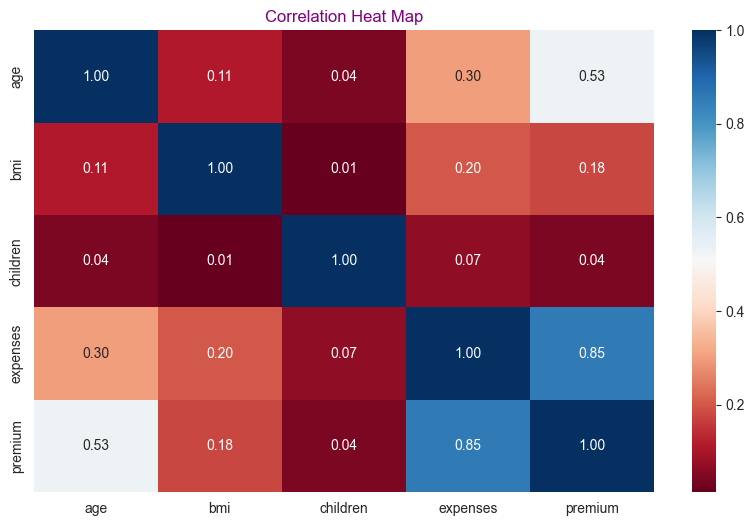

[('premium', 'expenses')]

In [47]:
high_correlated_cols(df, plot=True)

In [48]:
selected_cols = num_cols + ['expenses']
selected_df = df[selected_cols]
corr_matrix = selected_df.corr()

In [49]:
corr_matrix

,age,bmi,expenses,premium,expenses
age,1.000000,0.109341,0.299008,0.530327,0.299008
bmi,0.109341,1.000000,0.198576,0.177888,0.198576
expenses,0.299008,0.198576,1.000000,0.854005,1.000000
premium,0.530327,0.177888,0.854005,1.000000,0.854005
expenses,0.299008,0.198576,1.000000,0.854005,1.000000


In [50]:

# corr just with Selling_Price
expenses_corr = df.corr(numeric_only=True)['expenses'].sort_values(ascending=False)
print(expenses_corr)


expenses    1.000000
premium     0.854005
age         0.299008
bmi         0.198576
children    0.067998
Name: expenses, dtype: float64


<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Distribution of the Dependent Variable</p>

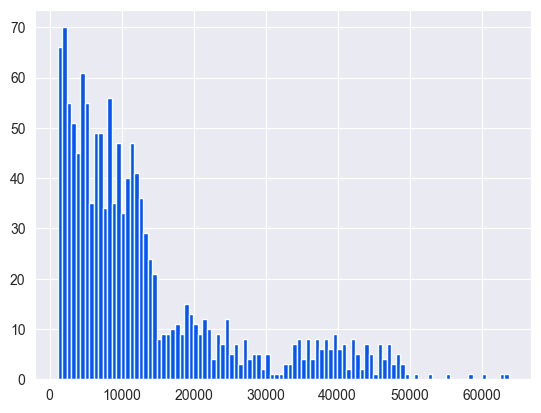

In [51]:
df["expenses"].hist(bins=100)
plt.show(block=True)

<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;"> Examining the Logarithm of the Dependent Variable
</p>

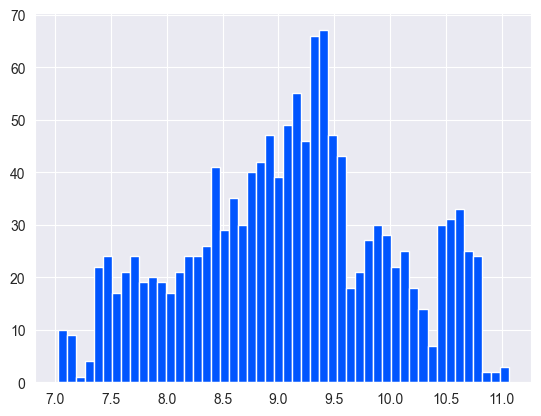

In [52]:
np.log1p(df['expenses']).hist(bins=50)
plt.show(block=True)

<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

- • Original (expenses):

 • Highly right-skewed distribution.

 • Most values are concentrated below 10,000.

 • Many outliers on the higher end (up to ~63,000).

 • Not ideal for modeling due to skewness and variance.

 • Log-transformed (np.log1p(expenses)):

 • Distribution becomes much more symmetric and closer to normal.

 • Outliers are compressed, reducing their influence.
 
 • Better suited for regression and machine learning models.

<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Missing Value Analysis</p>

In [53]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [54]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

- No columns contain missing values

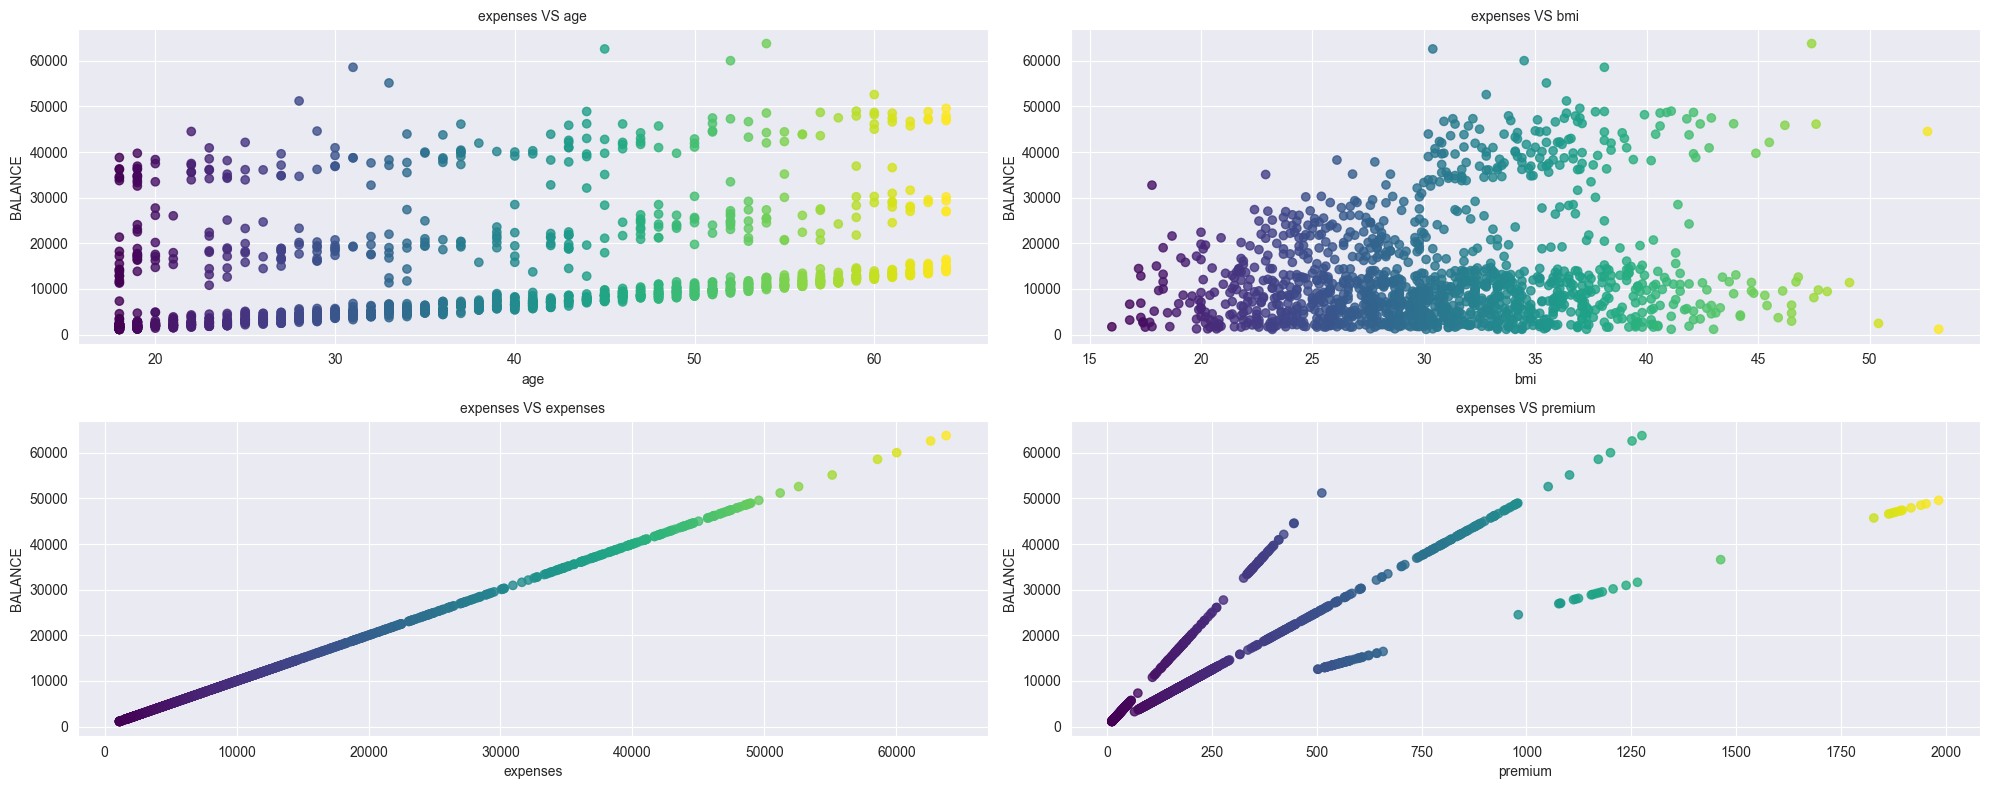

In [55]:
plt.figure(1 , figsize=(20 , 35))
n = 0 

for x in ['age', 'bmi', 'expenses', 'premium']:
    
    n += 1
    plt.subplot(9, 2, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

   
    plt.scatter(df[x], df['expenses'], c=df[x], cmap='viridis', alpha=0.8)

    plt.title(f'expenses VS {x}', fontsize=10)
    plt.xlabel(x)
    plt.ylabel('BALANCE')

plt.tight_layout()
plt.show()

C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3428897294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[column], palette=palette)


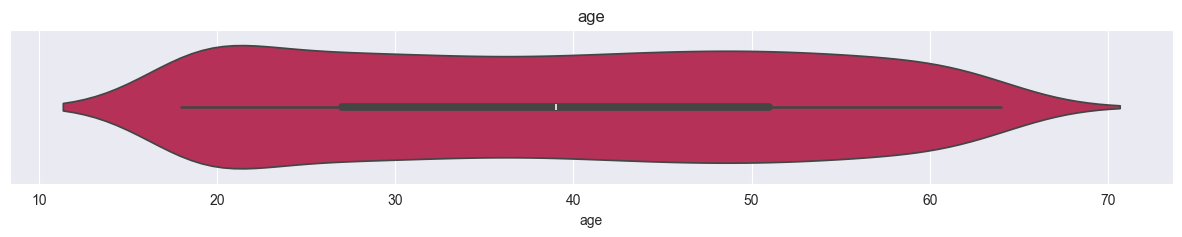

C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3428897294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[column], palette=palette)


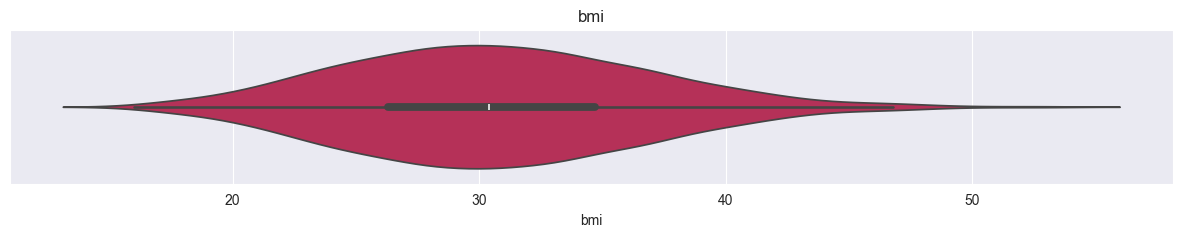

C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3428897294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[column], palette=palette)


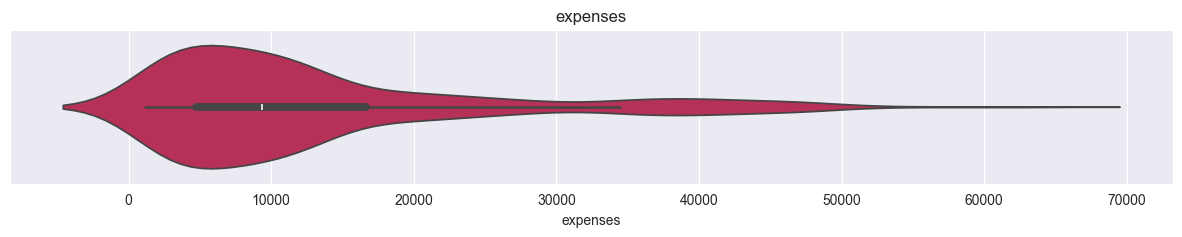

C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3428897294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[column], palette=palette)


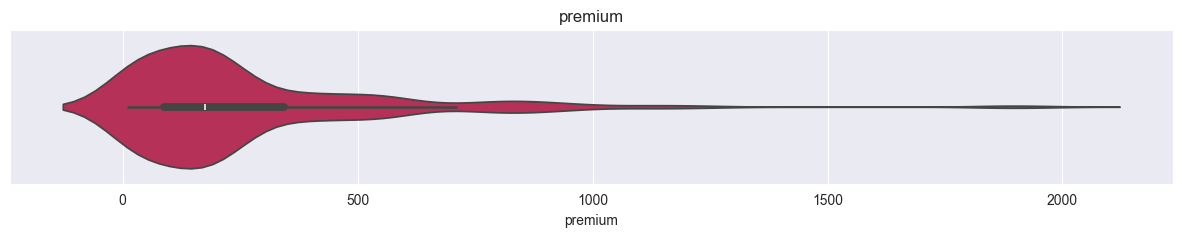

C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3428897294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[column], palette=palette)


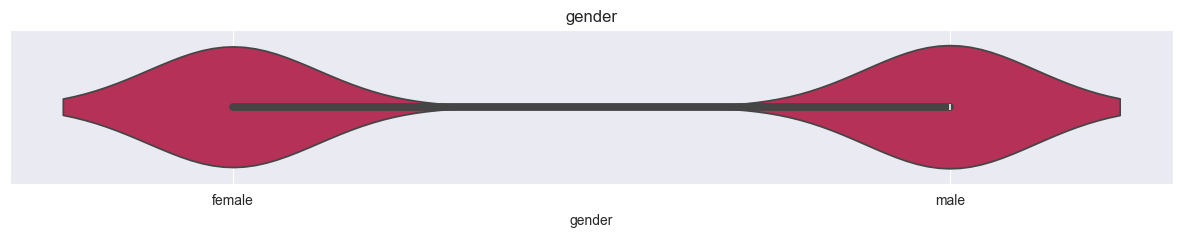

C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3428897294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[column], palette=palette)


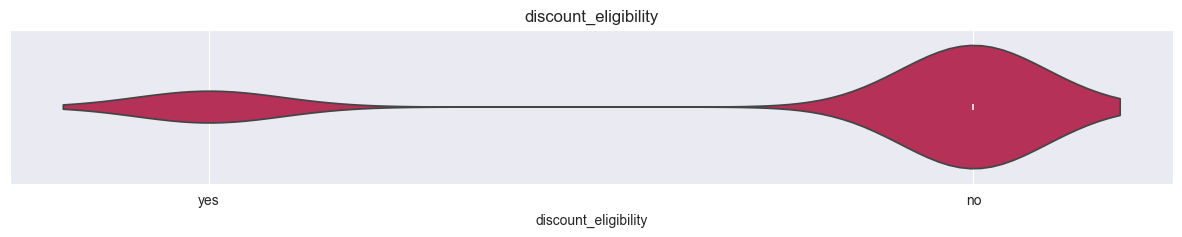

C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3428897294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[column], palette=palette)


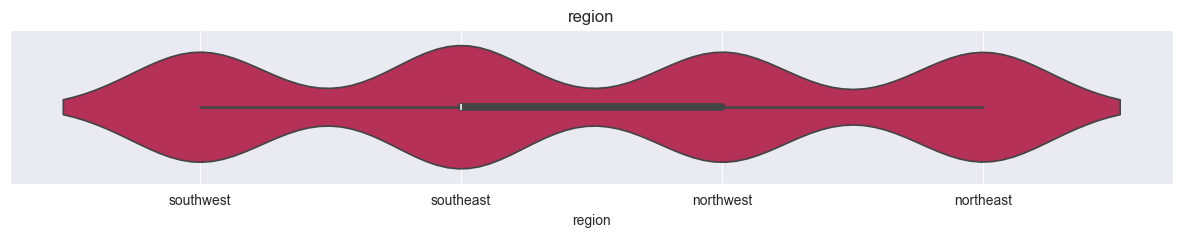

C:\Users\SONY\AppData\Local\Temp\ipykernel_7312\3428897294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[column], palette=palette)


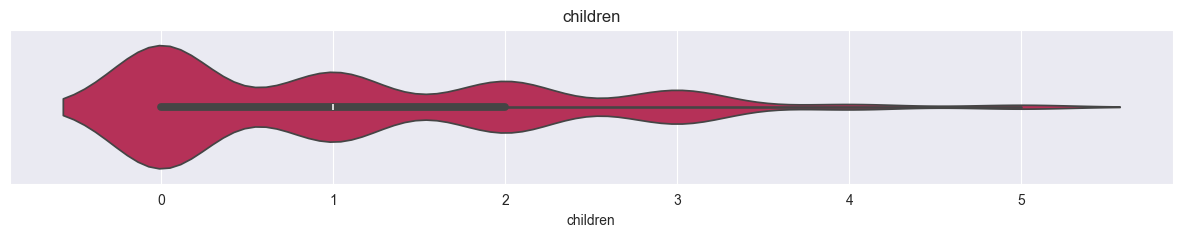

In [56]:
palette ="rocket"
columns1=['age', 'bmi', 'expenses', 'premium','gender', 'discount_eligibility', 'region', 'children']
for column in columns1:
    plt.figure(figsize=(15,2))
    sns.violinplot(x=df[column], palette=palette)
    plt.title(column)
    plt.show()

c:\Users\SONY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1832: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=self.x, y=self.y, **kwargs)


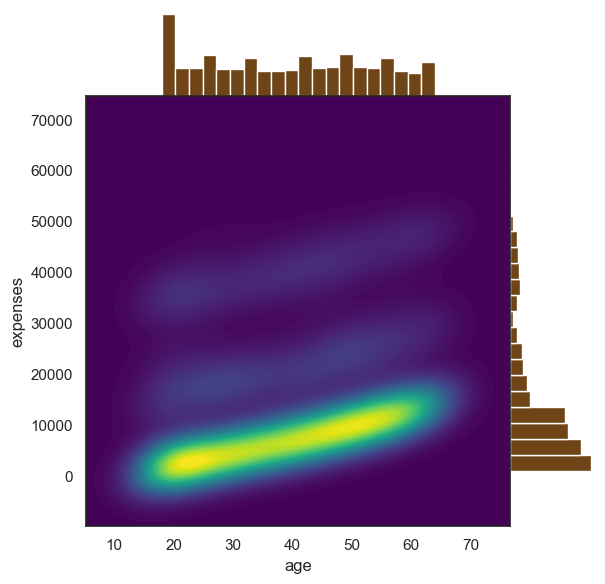

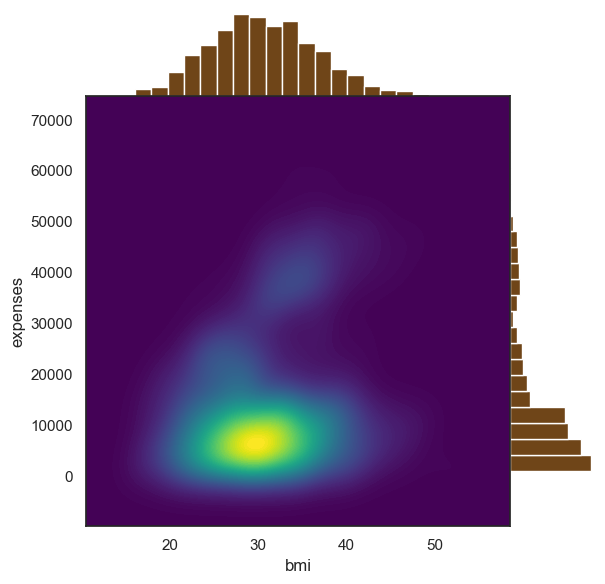

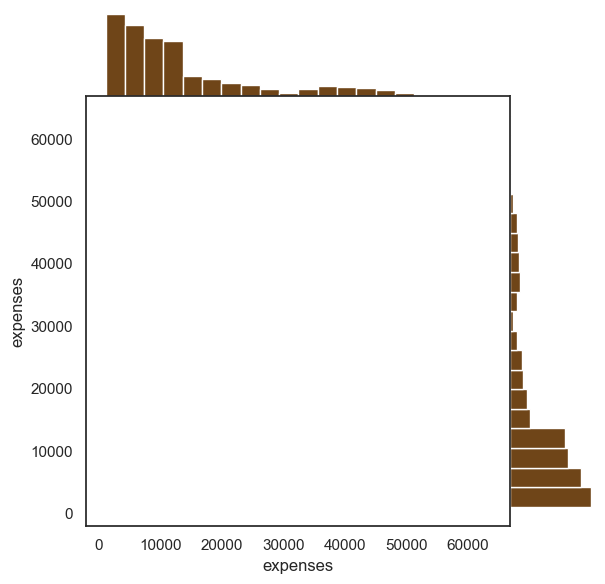

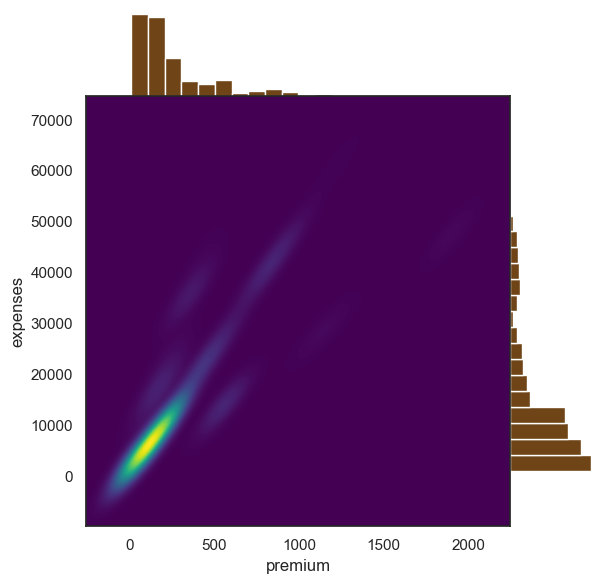

In [57]:
df_c=['age', 'bmi', 'expenses', 'premium']  
for i in df_c:
    sns.set_theme(style="white")
    g = sns.JointGrid(data=df, x=i,y='expenses',space=0)
    g.plot_joint(sns.kdeplot,fill=True,thresh=0, levels=100, cmap="viridis")
    g.plot_marginals(sns.histplot, color="#6f4518", alpha=1, bins=20)

In [58]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        print(pd.DataFrame({'COUNT': dataframe[col].value_counts(),
                            'RATIO': dataframe[col].value_counts() / len(dataframe),
                            'TARGET_MEAN': dataframe.groupby(col)[target].mean()}), end='\n\n\n')

In [59]:
rare_analyser(df, "expenses", cat_cols)

gender : 2
        COUNT     RATIO   TARGET_MEAN
gender                               
female    662  0.494768  12569.578897
male      676  0.505232  13956.751420


discount_eligibility : 2
                      COUNT     RATIO   TARGET_MEAN
discount_eligibility                               
no                     1064  0.795217   8434.268449
yes                     274  0.204783  32050.231971


region : 4
           COUNT     RATIO   TARGET_MEAN
region                                  
northeast    324  0.242152  13406.384691
northwest    325  0.242900  12417.575169
southeast    364  0.272048  14735.411538
southwest    325  0.242900  12346.937908


children : 6
          COUNT     RATIO   TARGET_MEAN
children                               
0           574  0.428999  12365.975767
1           324  0.242152  12731.171821
2           240  0.179372  15073.564000
3           157  0.117339  15355.318535
4            25  0.018685  13850.656800
5            18  0.013453   8786.035556




In [60]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

In [61]:
rare_encoder(df, 0.01)

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,southeast,1629.83,16.2983
1336,21,female,25.8,0,no,southwest,2007.95,20.0795


<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

- The rare_encoder() function:

• Finds columns that are text (objects).

• If there are values ​​in those columns that are very rarely repeated (e.g. less than 1%), it converts 

those values ​​to 'Rare'.

• Used for simplification before modeling.

<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Feature Extraction</p>

In [62]:
# 1. first male
male_condition = df['gender'] == 'male'
df.loc[male_condition, 'AGE_GROUP'] = pd.cut(
    df.loc[male_condition, 'age'],
    bins=[0, 40, 60, 100],
    labels=["Young_Adults_Male", "Middle-Aged_Adults_Male", "Old_Adults_Male"],
    right=False
)

# 2. Categoric to str
df['AGE_GROUP'] = df['AGE_GROUP'].astype(str)

# 3. Fill NaN with woman
female_condition = df['gender'] == 'female'
df.loc[female_condition, 'AGE_GROUP'] = pd.cut(
    df.loc[female_condition, 'age'],
    bins=[0, 40, 60, 100],
    labels=["Young_Adults_Female", "Middle-Aged_Adults_Female", "Old_Adults_Female"],
    right=False
).astype(str)  # to str

<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

- • Helps in grouped analysis (e.g., average insurance cost by age group & gender).

 • Makes it easier to build features for machine learning models.
 
 • Improves interpretability of data and visualizations.

In [63]:
df['NEW_BMI'] = pd.cut(x=df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100],
                       labels=["Underweight", "Healthy", "Overweight", "Obese",]).astype(str)

In [64]:
df["NEW_AGE_BMI_NOM"] = df["NEW_BMI"] + df["AGE_GROUP"]

<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

- Creates a new combined categorical feature

In [65]:
# 1. RISKY: Those who both smoke and are overweight/obese
df['risk_high'] = ((df['discount_eligibility'] == "yes") &
              (df['NEW_BMI'].isin(['Overweight', 'Obese_1', 'Obese_2', 'Obese_3']))).astype(int)

# 2. RISK: Only overweight/obese (including non-smokers)
df['risk_medium'] = df['NEW_BMI'].isin(['Overweight', 'Obese_1', 'Obese_2', 'Obese_3']).astype(int)

In [66]:
df["risk_score"] = df["risk_high"] * 50 + df["risk_medium"] * 25 + df["age"]

In [67]:
df['risk_group'] = pd.qcut(x=df['risk_score'], q=4,
                       labels=["no_risk", "medium_risky", "high_risky", "very_high_risky"]).astype(str)

In [68]:
df['bmi_age_ratio'] = df['bmi'] / df['age']
df['children_discount'] = df['children'] * df['discount_eligibility'].map({'yes': 1, 'no': 0})

<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

- Is there a connection between having children and getting a discount?

In [69]:
df['age_squared'] = df['age'] ** 2
df['bmi_cubed'] = df['bmi'] ** 3

In [70]:
df.columns = [col.upper() for col in df.columns]

In [71]:
df1=df.head()
df1

,AGE,GENDER,BMI,CHILDREN,DISCOUNT_ELIGIBILITY,REGION,EXPENSES,PREMIUM,AGE_GROUP,NEW_BMI,NEW_AGE_BMI_NOM,RISK_HIGH,RISK_MEDIUM,RISK_SCORE,RISK_GROUP,BMI_AGE_RATIO,CHILDREN_DISCOUNT,AGE_SQUARED,BMI_CUBED
0,19,female,27.9,0,yes,southwest,16884.92,168.8492,Young_Adults_Female,Overweight,OverweightYoung_Adults_Female,1,1,94,very_high_risky,1.468421,0,361,21717.639
1,18,male,33.8,1,no,southeast,1725.55,17.2555,Young_Adults_Male,Obese,ObeseYoung_Adults_Male,0,0,18,no_risk,1.877778,0,324,38614.472
2,28,male,33.0,3,no,southeast,4449.46,44.4946,Young_Adults_Male,Obese,ObeseYoung_Adults_Male,0,0,28,no_risk,1.178571,0,784,35937.000
3,33,male,22.7,0,no,northwest,21984.47,439.6894,Young_Adults_Male,Healthy,HealthyYoung_Adults_Male,0,0,33,medium_risky,0.687879,0,1089,11697.083
4,32,male,28.9,0,no,northwest,3866.86,77.3372,Young_Adults_Male,Overweight,OverweightYoung_Adults_Male,0,1,57,high_risky,0.903125,0,1024,24137.569


<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;"> Encoding</p>

In [72]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 1338
Variables: 19
cat_cols: 10
num_cols: 8
cat_but_car: 1
num_but_cat: 4


In [73]:
cat_cols


['GENDER',
 'DISCOUNT_ELIGIBILITY',
 'REGION',
 'AGE_GROUP',
 'NEW_BMI',
 'RISK_GROUP',
 'CHILDREN',
 'RISK_HIGH',
 'RISK_MEDIUM',
 'CHILDREN_DISCOUNT']

In [74]:
num_cols

['AGE',
 'BMI',
 'EXPENSES',
 'PREMIUM',
 'RISK_SCORE',
 'BMI_AGE_RATIO',
 'AGE_SQUARED',
 'BMI_CUBED']

In [75]:
cat_but_car

['NEW_AGE_BMI_NOM']

In [76]:
num_but_cat

['CHILDREN', 'RISK_HIGH', 'RISK_MEDIUM', 'CHILDREN_DISCOUNT']

In [77]:
cat_cols = cat_cols + cat_but_car

In [78]:
cat_cols

['GENDER',
 'DISCOUNT_ELIGIBILITY',
 'REGION',
 'AGE_GROUP',
 'NEW_BMI',
 'RISK_GROUP',
 'CHILDREN',
 'RISK_HIGH',
 'RISK_MEDIUM',
 'CHILDREN_DISCOUNT',
 'NEW_AGE_BMI_NOM']

In [79]:
# Label Encoding

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

- This method is only suitable for binary columns

In [80]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [81]:
binary_cols


['GENDER', 'DISCOUNT_ELIGIBILITY']

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
for col in binary_cols:
    df = label_encoder(df, col)

In [84]:
df.head()

,AGE,GENDER,BMI,CHILDREN,DISCOUNT_ELIGIBILITY,REGION,EXPENSES,PREMIUM,AGE_GROUP,NEW_BMI,NEW_AGE_BMI_NOM,RISK_HIGH,RISK_MEDIUM,RISK_SCORE,RISK_GROUP,BMI_AGE_RATIO,CHILDREN_DISCOUNT,AGE_SQUARED,BMI_CUBED
0,19,0,27.9,0,1,southwest,16884.92,168.8492,Young_Adults_Female,Overweight,OverweightYoung_Adults_Female,1,1,94,very_high_risky,1.468421,0,361,21717.639
1,18,1,33.8,1,0,southeast,1725.55,17.2555,Young_Adults_Male,Obese,ObeseYoung_Adults_Male,0,0,18,no_risk,1.877778,0,324,38614.472
2,28,1,33.0,3,0,southeast,4449.46,44.4946,Young_Adults_Male,Obese,ObeseYoung_Adults_Male,0,0,28,no_risk,1.178571,0,784,35937.000
3,33,1,22.7,0,0,northwest,21984.47,439.6894,Young_Adults_Male,Healthy,HealthyYoung_Adults_Male,0,0,33,medium_risky,0.687879,0,1089,11697.083
4,32,1,28.9,0,0,northwest,3866.86,77.3372,Young_Adults_Male,Overweight,OverweightYoung_Adults_Male,0,1,57,high_risky,0.903125,0,1024,24137.569


In [85]:
# One-Hot Encoding

cat_cols = [col for col in cat_cols if col not in binary_cols]

In [86]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [87]:
df = one_hot_encoder(df, cat_cols)

In [88]:
df.head()

,AGE,GENDER,BMI,DISCOUNT_ELIGIBILITY,EXPENSES,PREMIUM,RISK_SCORE,BMI_AGE_RATIO,AGE_SQUARED,BMI_CUBED,...,NEW_AGE_BMI_NOM_OverweightMiddle-Aged_Adults_Male,NEW_AGE_BMI_NOM_OverweightOld_Adults_Female,NEW_AGE_BMI_NOM_OverweightOld_Adults_Male,NEW_AGE_BMI_NOM_OverweightYoung_Adults_Female,NEW_AGE_BMI_NOM_OverweightYoung_Adults_Male,NEW_AGE_BMI_NOM_UnderweightMiddle-Aged_Adults_Female,NEW_AGE_BMI_NOM_UnderweightMiddle-Aged_Adults_Male,NEW_AGE_BMI_NOM_UnderweightOld_Adults_Female,NEW_AGE_BMI_NOM_UnderweightYoung_Adults_Female,NEW_AGE_BMI_NOM_UnderweightYoung_Adults_Male
0,19,0,27.9,1,16884.92,168.8492,94,1.468421,361,21717.639,...,False,False,False,True,False,False,False,False,False,False
1,18,1,33.8,0,1725.55,17.2555,18,1.877778,324,38614.472,...,False,False,False,False,False,False,False,False,False,False
2,28,1,33.0,0,4449.46,44.4946,28,1.178571,784,35937.000,...,False,False,False,False,False,False,False,False,False,False
3,33,1,22.7,0,21984.47,439.6894,33,0.687879,1089,11697.083,...,False,False,False,False,False,False,False,False,False,False
4,32,1,28.9,0,3866.86,77.3372,57,0.903125,1024,24137.569,...,False,False,False,False,True,False,False,False,False,False


In [89]:
df.dtypes

AGE                                                       int64
GENDER                                                    int32
BMI                                                     float64
DISCOUNT_ELIGIBILITY                                      int32
EXPENSES                                                float64
                                                         ...   
NEW_AGE_BMI_NOM_UnderweightMiddle-Aged_Adults_Female       bool
NEW_AGE_BMI_NOM_UnderweightMiddle-Aged_Adults_Male         bool
NEW_AGE_BMI_NOM_UnderweightOld_Adults_Female               bool
NEW_AGE_BMI_NOM_UnderweightYoung_Adults_Female             bool
NEW_AGE_BMI_NOM_UnderweightYoung_Adults_Male               bool
Length: 67, dtype: object

In [90]:
#bool_cols = df.select_dtypes("bool").columns
#df[bool_cols] = df[bool_cols].astype(int)

<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;"> Standardization Process</p>

In [91]:
num_cols = [col for col in num_cols if col not in ["expenses"]]

In [92]:
from sklearn.preprocessing import RobustScaler

In [93]:
scaler = RobustScaler()

In [94]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [95]:
df.head(10)

,AGE,GENDER,BMI,DISCOUNT_ELIGIBILITY,EXPENSES,PREMIUM,RISK_SCORE,BMI_AGE_RATIO,AGE_SQUARED,BMI_CUBED,...,NEW_AGE_BMI_NOM_OverweightMiddle-Aged_Adults_Male,NEW_AGE_BMI_NOM_OverweightOld_Adults_Female,NEW_AGE_BMI_NOM_OverweightOld_Adults_Male,NEW_AGE_BMI_NOM_OverweightYoung_Adults_Female,NEW_AGE_BMI_NOM_OverweightYoung_Adults_Male,NEW_AGE_BMI_NOM_UnderweightMiddle-Aged_Adults_Female,NEW_AGE_BMI_NOM_UnderweightMiddle-Aged_Adults_Male,NEW_AGE_BMI_NOM_UnderweightOld_Adults_Female,NEW_AGE_BMI_NOM_UnderweightYoung_Adults_Female,NEW_AGE_BMI_NOM_UnderweightYoung_Adults_Male
0,-0.833333,0,-0.297619,1,0.630515,-0.024058,1.586207,1.320439,-0.619658,-0.270314,...,False,False,False,True,False,False,False,False,False,False
1,-0.875000,1,0.404762,0,-0.643422,-0.617253,-1.034483,2.107078,-0.639423,0.445943,...,False,False,False,False,False,False,False,False,False,False
2,-0.458333,1,0.309524,0,-0.414515,-0.510665,-0.689655,0.763450,-0.393697,0.332445,...,False,False,False,False,False,False,False,False,False,False
3,-0.250000,1,-0.916667,0,1.059062,1.035755,-0.517241,-0.179488,-0.230769,-0.695085,...,False,False,False,False,False,False,False,False,False,False
4,-0.291667,1,-0.178571,0,-0.463474,-0.382150,0.310345,0.234139,-0.265491,-0.167733,...,False,False,False,False,True,False,False,False,False,False
5,-0.333333,0,-0.559524,0,-0.472738,-0.390777,0.275862,0.091759,-0.299145,-0.471371,...,False,False,False,True,False,False,False,False,False,False
6,0.291667,0,0.357143,0,-0.095922,-0.039857,-0.068966,-0.106066,0.317842,0.388514,...,False,False,False,False,False,False,False,False,False,False
7,-0.083333,0,-0.321429,0,-0.176520,-0.114916,0.482759,-0.062710,-0.081197,-0.289970,...,False,False,False,True,False,False,False,False,False,False
8,-0.083333,1,-0.071429,0,-0.250060,-0.183402,0.482759,0.046356,-0.081197,-0.069133,...,False,False,False,False,True,False,False,False,False,False
9,0.875000,0,-0.547619,0,1.642161,1.578783,1.275862,-0.675041,1.110577,-0.462939,...,False,True,False,False,False,False,False,False,False,False


In [96]:
df.columns

Index(['AGE', 'GENDER', 'BMI', 'DISCOUNT_ELIGIBILITY', 'EXPENSES', 'PREMIUM',
       'RISK_SCORE', 'BMI_AGE_RATIO', 'AGE_SQUARED', 'BMI_CUBED',
       'REGION_northeast', 'REGION_northwest', 'REGION_southeast',
       'REGION_southwest', 'AGE_GROUP_Middle-Aged_Adults_Female',
       'AGE_GROUP_Middle-Aged_Adults_Male', 'AGE_GROUP_Old_Adults_Female',
       'AGE_GROUP_Old_Adults_Male', 'AGE_GROUP_Young_Adults_Female',
       'AGE_GROUP_Young_Adults_Male', 'NEW_BMI_Healthy', 'NEW_BMI_Obese',
       'NEW_BMI_Overweight', 'NEW_BMI_Underweight', 'RISK_GROUP_high_risky',
       'RISK_GROUP_medium_risky', 'RISK_GROUP_no_risk',
       'RISK_GROUP_very_high_risky', 'CHILDREN_0', 'CHILDREN_1', 'CHILDREN_2',
       'CHILDREN_3', 'CHILDREN_4', 'CHILDREN_5', 'RISK_HIGH_0', 'RISK_HIGH_1',
       'RISK_MEDIUM_0', 'RISK_MEDIUM_1', 'CHILDREN_DISCOUNT_0',
       'CHILDREN_DISCOUNT_1', 'CHILDREN_DISCOUNT_2', 'CHILDREN_DISCOUNT_3',
       'CHILDREN_DISCOUNT_4', 'CHILDREN_DISCOUNT_5',
       'NEW_AGE_BMI_N

<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Creating Model</p>

In [97]:

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
#from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

import warnings
warnings.simplefilter(action="ignore")

In [98]:
df['LOG_EXPENSES'] = np.log1p(df['EXPENSES'])

In [99]:
y = df["EXPENSES"]

In [100]:
X = df.drop(["LOG_EXPENSES", "EXPENSES"], axis=1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [102]:
from xgboost import XGBRegressor
import time

In [103]:
# Model list
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor(n_jobs=1)),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor(n_jobs=1)),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror', n_jobs=1)),
          ("CatBoost", CatBoostRegressor(verbose=False, thread_count=1))]
# Initialize empty lists to store metrics and execution times
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []
model_names = []

# Main loop to fit, predict, and evaluate each model
for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)
    
    # Calculate R^2 score
    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate MAE
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    # Store model name
    model_names.append(name)

# Create a DataFrame to hold all the metrics and execution times
results_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R^2 Score': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'Execution Time (s)': execution_times
})

results_df


,Model,RMSE,R^2 Score,MAE,MSE,Execution Time (s)
0,LR,0.340707,0.897685,0.219792,0.112176,0.196993
1,Ridge,0.339404,0.898272,0.220311,0.111533,0.102971
2,Lasso,1.015327,-0.000919,0.806188,1.097388,0.106022
3,ElasticNet,0.767424,0.434924,0.611009,0.619538,0.097956
4,KNN,0.398308,0.862017,0.203709,0.151282,4.968403
5,CART,0.123564,0.991679,0.018742,0.009123,0.228009
6,RF,0.089977,0.992926,0.018736,0.007756,10.222740
7,GBM,0.082482,0.994898,0.032915,0.005594,3.309640
8,XGBoost,0.093899,0.994021,0.018269,0.006555,2.195702
9,CatBoost,0.084699,0.994810,0.030110,0.005690,39.705289


<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;"> Hyperparameter optimization</p>

In [104]:
# Initialize lists to store metrics
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []
model_names = []

# Define the hyperparameters for each model

param_grids = {
    'LR': {},
    'Ridge': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
    'KNN': {'n_neighbors': [1, 3, 5, 7, 9]},
    'CART': {'max_depth': [None, 5, 10, 20, 30], 'min_samples_leaf': [1, 2, 3]},
    'RF': {'n_estimators': [10, 30, 50, 70, 100], 'max_depth': [None, 5, 10, 20]},
    'GBM': {'n_estimators': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1]},
    'XGBoost': {'n_estimators': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1]},
    # 'LightGBM': {'n_estimators': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1]},
    'CatBoost': {'iterations': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1], 'depth': [3, 4, 5, 6, 7]}
}

# Variables to store best model and score globally
best_global_score = np.inf
best_global_model = None

# Main loop to fit, predict, and evaluate each model
for name, regressor in models:
    start_time = time.time()
    
    # Hyperparameter tuning with GridSearchCV if param_grids is defined
    if param_grids.get(name):
        grid_search = GridSearchCV(regressor, param_grid=param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = regressor
        best_model.fit(X_train, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    # Update best global model and score
    if rmse < best_global_score:
        best_global_score = rmse
        best_global_model = best_model

    # Calculate other metrics
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate execution time
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    # Store model name
    model_names.append(name)

# Create a DataFrame to store all the metrics and execution times
results_with_tuning_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R^2 Score': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'Execution Time (s)': execution_times
})

results_with_tuning_df

,Model,RMSE,R^2 Score,MAE,MSE,Execution Time (s)
0,LR,0.334927,0.897685,0.219792,0.112176,0.129987
1,Ridge,0.333965,0.898272,0.220311,0.111533,9.261890
2,Lasso,0.348023,0.889528,0.234302,0.121120,0.696915
3,ElasticNet,0.329944,0.900707,0.219555,0.108863,3.099631
4,KNN,0.396036,0.856944,0.199276,0.156844,1.490824
5,CART,0.086462,0.993181,0.016943,0.007476,3.104627
6,RF,0.089364,0.992716,0.019934,0.007986,55.489398
7,GBM,0.076247,0.994697,0.033665,0.005814,12.275532
8,XGBoost,0.080114,0.994146,0.016777,0.006418,13.541346
9,CatBoost,0.091876,0.992301,0.046976,0.008441,90.348052


In [105]:
best_global_model

GradientBoostingRegressor()

In [106]:
# Final Prediction Model
final_model = best_global_model

# Make predictions on the test set using the final model
y_final_pred = final_model.predict(X_test)
final_y_pred = (y_final_pred)
final_y_test =(y_test)

In [107]:
# Creating DataFrame with predicted and actual values
results = pd.DataFrame({'Predicted Value': final_y_pred, 'True Value': final_y_test})

# Adding the difference between actual and forecasted prices as a new column
results['Difference'] = results['True Value'] - results['Predicted Value']

# Add an absolute difference column
results['Absolute Difference'] = results['Difference'].abs()

# Show the 5 worst predictions (largest to smallest by absolute difference)
print("5 worst predictions:")
print(results.sort_values(by='Absolute Difference', ascending=False).head().drop('Absolute Difference', axis=1))

# Show top 5 predictions (smallest to largest by absolute difference)
print("\ntop 5 predictions:")
print(results.sort_values(by='Absolute Difference').head().drop('Absolute Difference', axis=1))

5 worst predictions:
     Predicted Value  True Value  Difference
29          2.951241    2.464696   -0.486545
770         2.036135    1.559651   -0.476484
543         4.149991    4.570597    0.420606
298         2.867695    2.467668   -0.400027
599         1.646796    2.024428    0.377632

top 5 predictions:
      Predicted Value  True Value  Difference
1235        -0.561588   -0.561569    0.000019
363         -0.570156   -0.570123    0.000033
76          -0.456810   -0.456705    0.000105
1299        -0.560494   -0.560623   -0.000129
31          -0.603507   -0.603703   -0.000196


<div style="border-radius:10px; border:#778da9 solid; padding: 15px; background-color:#e0e1dd
            ; font-size:110%; text-align:left">

-  Final Model Predictions and Comparison with True Prices

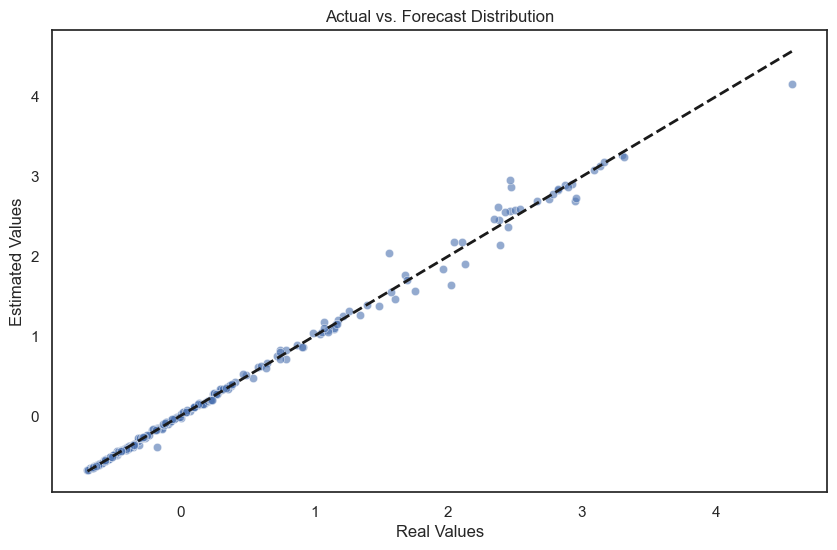

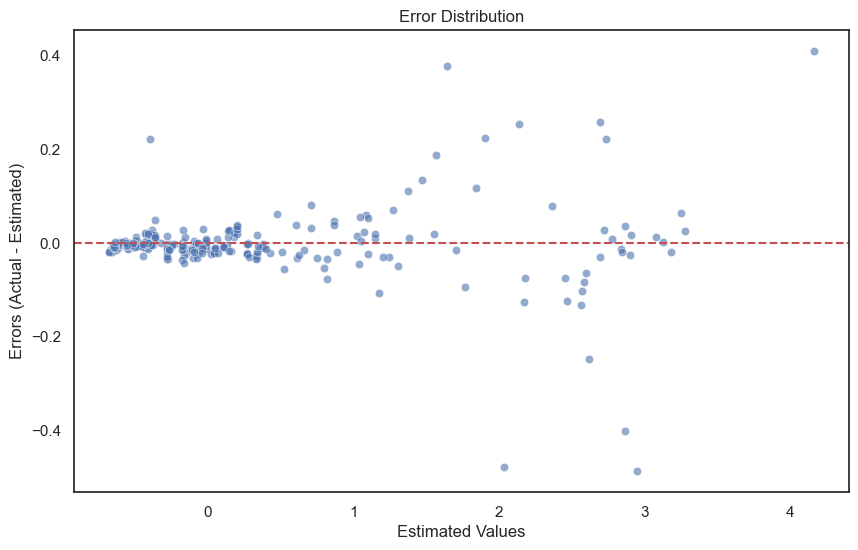

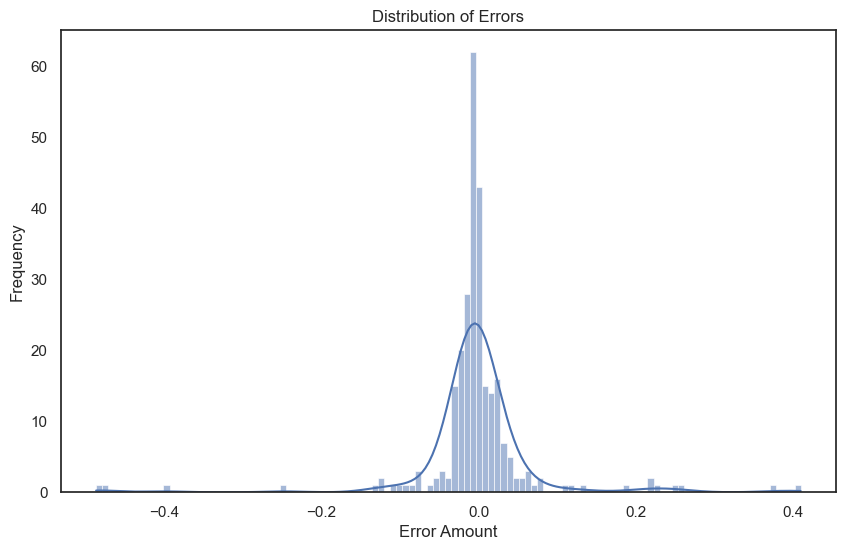

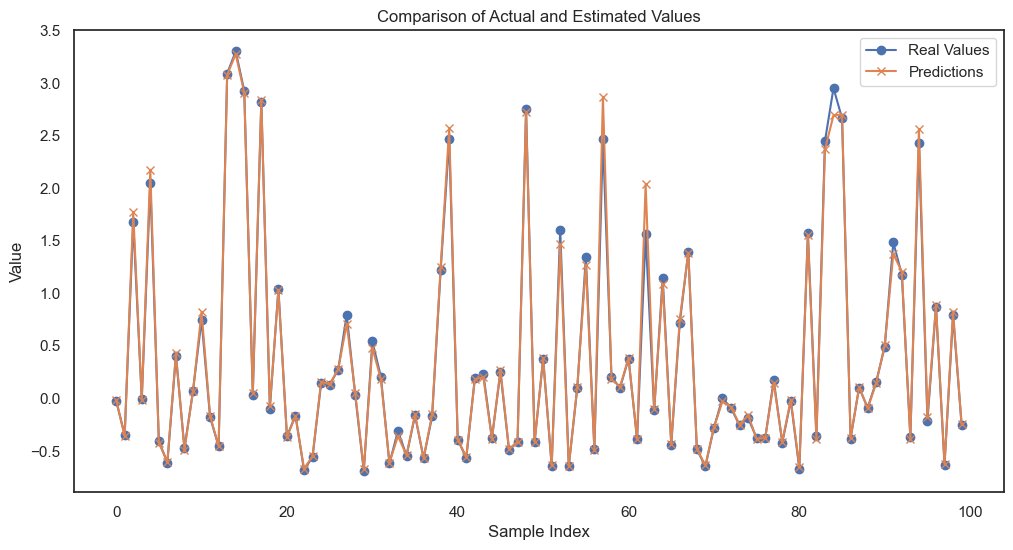

Regression Model Performance Metrics:
RMSE: 0.0767
MAE: 0.0338
R² Skoru: 0.9946


In [108]:
# Training the model
best_global_model.fit(X_train, y_train)

# Predictions
y_final_pred = best_global_model.predict(X_test)

# 1. Actual vs. Forecast Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_final_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Estimated Values')
plt.title('Actual vs. Forecast Distribution')
plt.show()

# 2. Error Distribution Graph (Residual Plot)
residuals = y_test - y_final_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_final_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Estimated Values')
plt.ylabel('Errors (Actual - Estimated)')
plt.title('Error Distribution')
plt.show()

# 3. Error Density Graph
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Error Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()

# 4. Comparison of Actual and Estimated Values (First 100 Examples)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Real Values', marker='o')
plt.plot(y_final_pred[:100], label='Predictions', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Actual and Estimated Values')
plt.legend()
plt.show()

# Performance Metrics
print("Regression Model Performance Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_final_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_final_pred):.4f}")
print(f"R² Skoru: {r2_score(y_test, y_final_pred):.4f}")

<a id="ml"></a>
# <p style="background-color:#ff69b4;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Feature Importance</p>

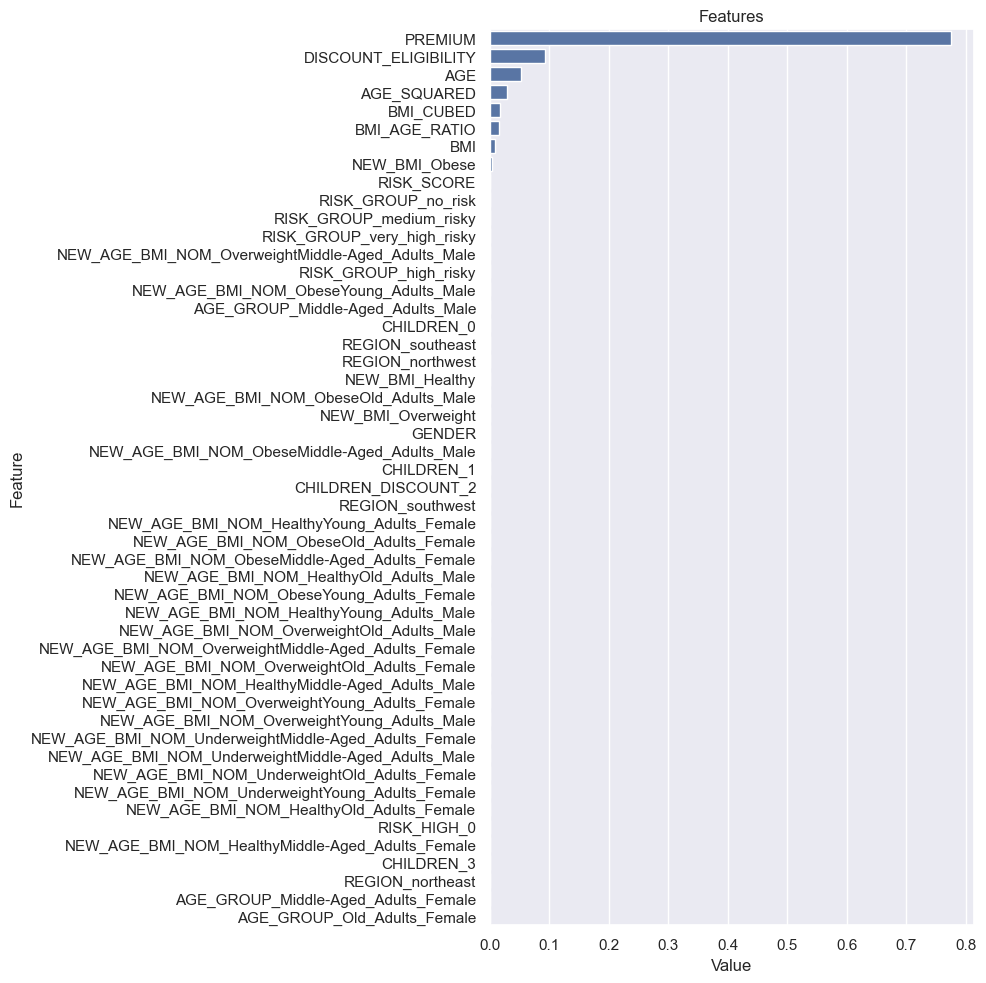

In [109]:
def plot_importance(model, features, num=50, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

plot_importance(final_model, X)